# MINI-PROJECT
# GROUP - 8
# Model 1

#### GROUP MEMBERS :  SHIVAM YADAV , RUSHIKESH GOSKI , RANJAN SUTRADHAR , VAISHNAVI TAMBE , JAYDHAWAL MADWANNA

## ABSTRACT
 We  Used 2013-19 The Coal Production Dataset From The U.S. Energy Information Administration's (EIA) as an exercise for Decision Tree Classifier.  The EIA uses the data for coal supply analyses and in short-term modeling efforts, which produce forecasts of coal supply and prices requested by Congress. The forecast data also appear in the Short-Term Energy Outlook and the Annual Energy Outlook. 

## Implementation Details
* Data Source: https://www.eia.gov/coal/data.php
* Data Split: (80% 20%)
* Model: Decision Tree Classifier 
* Model evalaution: Precision, Recall , F1-Score

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

### Loading CSV File in Pandas DataFrame
### Dataset ref: https://www.eia.gov/coal/data.php

In [2]:
df = pd.read_csv(r'coalUS.csv',encoding = "ISO-8859-1")
df.head()

,Year,MSHAID,MineName,STATE,MineCounty,MineStatus,MineType,CompanyType,OperationType,OperatingCompany,OperatingCompanyAddress,UnionCode,CoalSupplyRegion,Production,AverageEmployee,LabourHours,latitute,longitude
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392,32.3182,86.9023
1,2013,103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447,32.3182,86.9023
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784,32.3182,86.9023
3,2013,103246,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193,32.3182,86.9023
4,2013,103451,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393,32.3182,86.9023


### Our Dataset Contains
#### 7656 Rows
#### 18 Columns

In [3]:
df.shape

(7656, 18)

### Here we can see that we have two columns UnionCode & CoalSupplyRegion which have null values. 

In [4]:
df.isnull().sum()

Year                          0
MSHAID                        0
MineName                      0
STATE                         0
MineCounty                    0
MineStatus                    0
MineType                      0
CompanyType                   0
OperationType                 0
OperatingCompany              0
OperatingCompanyAddress       0
UnionCode                  5766
CoalSupplyRegion              1
Production                    0
AverageEmployee               0
LabourHours                   0
latitute                      0
longitude                     0
dtype: int64

### The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. Here, we can see mean & Standard Deviation does not Deviate largly. Quartile Range 25% to 75% also doesn't Deviate.

In [5]:
df.describe()

,Year,MSHAID,Production,AverageEmployee,LabourHours,latitute,longitude
count,7656.000000,7.656000e+03,7.656000e+03,7656.000000,7.656000e+03,7656.000000,7656.000000
mean,2015.667320,3.058066e+06,7.655730e+05,57.051855,1.261416e+05,38.837245,61.768806
std,2.023044,1.436422e+06,4.507137e+06,119.671463,2.692428e+05,2.516903,56.306354
min,2013.000000,1.003290e+05,0.000000e+00,0.000000,8.000000e+00,30.984300,-77.194527
25%,2014.000000,1.519164e+06,0.000000e+00,6.000000,9.298500e+03,37.735300,78.656900
50%,2015.000000,3.608248e+06,3.251750e+04,16.000000,3.270950e+04,38.368600,81.699900
75%,2017.000000,4.407313e+06,2.459240e+05,47.000000,1.065570e+05,41.203323,84.298700
max,2019.000000,5.000030e+06,1.179655e+08,1628.000000,3.349283e+06,64.200800,149.493700


### Here is the summary of the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656 entries, 0 to 7655
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     7656 non-null   int64  
 1   MSHAID                   7656 non-null   int64  
 2   MineName                 7656 non-null   object 
 3   STATE                    7656 non-null   object 
 4   MineCounty               7656 non-null   object 
 5   MineStatus               7656 non-null   object 
 6   MineType                 7656 non-null   object 
 7   CompanyType              7656 non-null   object 
 8   OperationType            7656 non-null   object 
 9   OperatingCompany         7656 non-null   object 
 10  OperatingCompanyAddress  7656 non-null   object 
 11  UnionCode                1890 non-null   object 
 12  CoalSupplyRegion         7655 non-null   object 
 13  Production               7656 non-null   int64  
 14  AverageEmployee         

### Here, We did Correlation to understand the relationships between independant & Dependant variables. The statistical relationship between two variables is referred to as their correlation. So here, Since our target variable/Dependant Variable is "Production", we are doing correlation to understand the relationship between other independant features in the dataset.
#### Here you can see that AverageEmployee & LabourHour are more correlated to our target variable & the other attributes are less correlated.

In [7]:
corr=df.corr()['Production']
corr.abs().sort_values(ascending=False)[1:]

AverageEmployee    0.705613
LabourHours        0.670527
latitute           0.142736
longitude          0.079709
MSHAID             0.065876
Year               0.006391
Name: Production, dtype: float64

### Heatmap is defined as a graphical representation of data using colors to visualize the value of the matrix. In this, to represent more common values or higher activities brighter colors basically reddish colors are used and to represent less common or activity values, darker colors are preferred. So here, in production cell, AverageEmployee & Labour Hours are brighter in color hence more correlated.

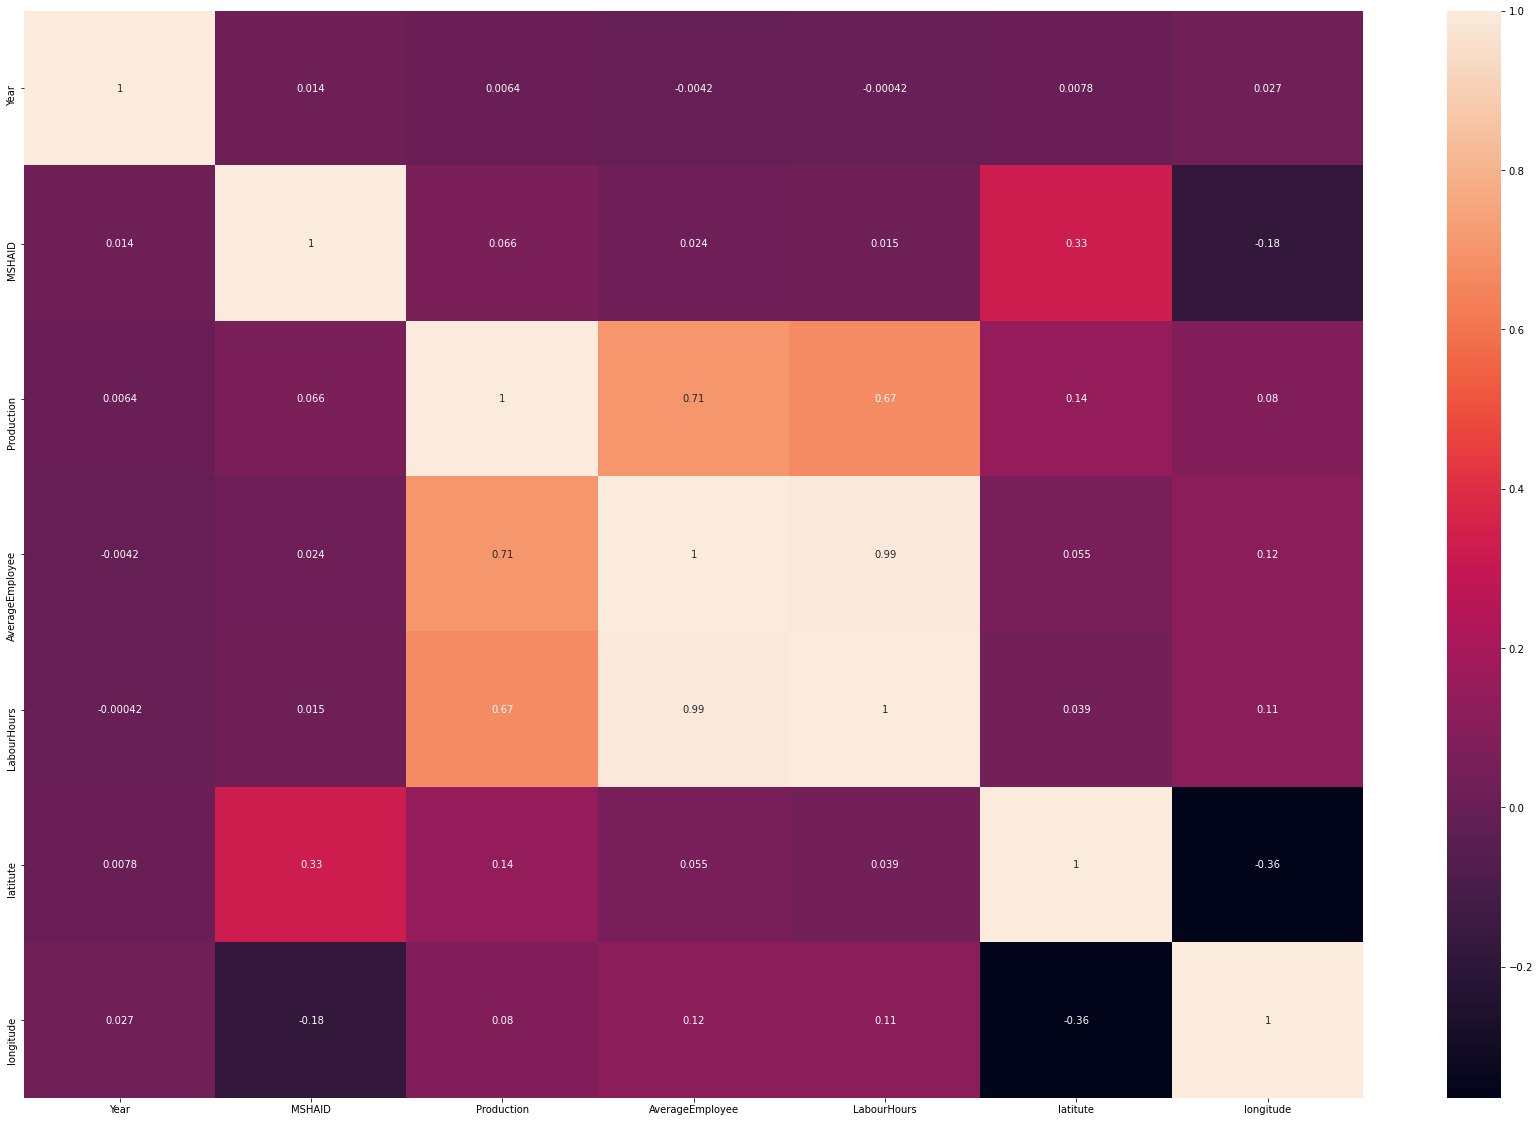

In [8]:
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, ax=ax);

### A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. In this plot we chose a categorical column for the x-axis(State) and a numerical column for the y-axis(Production), and we see that it creates a plot taking a mean per categorical column.
### So Here we can see that average production of coal from 2013-2019 is distributed state wise. Here, we can see that the Wyoming State has the Mean Highest Coal Production and Pennsylvania has the Mean Lowest Coal Production.

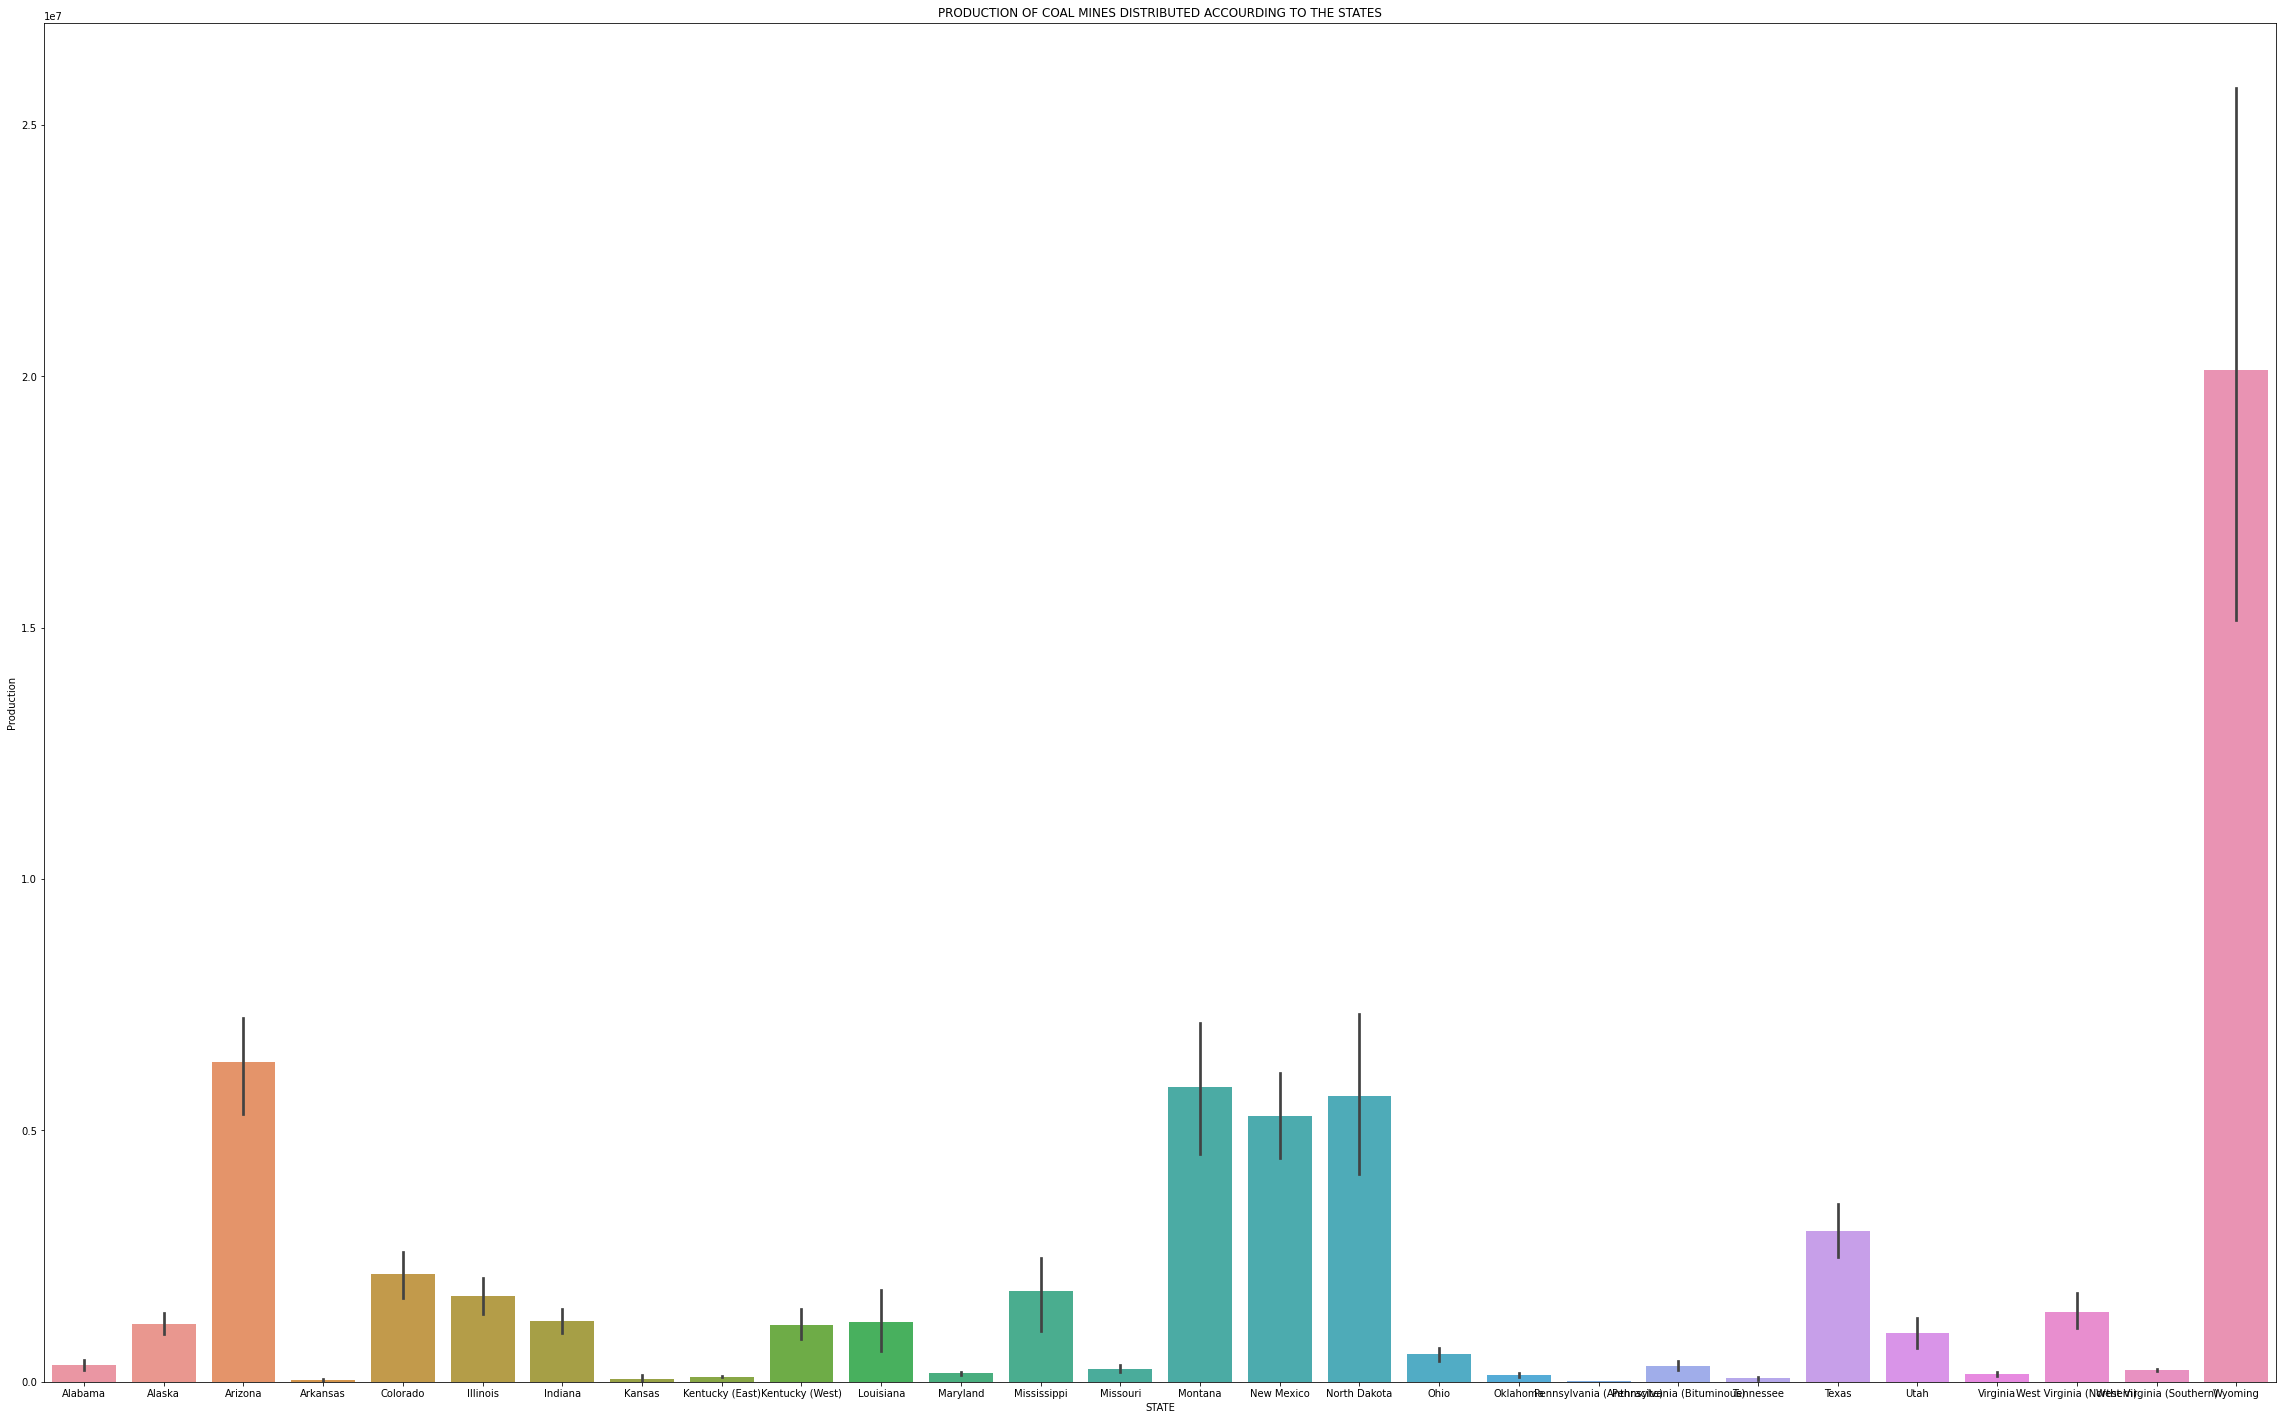

In [9]:
from sklearn.cluster import KMeans
plt.figure(figsize=(40,25))
plt.title('PRODUCTION OF COAL MINES DISTRIBUTED ACCOURDING TO THE STATES')
sns.barplot(x=df['STATE'], y=df['Production'])
#plt.legend(loc='upper left')
plt.show()

In [10]:
#le = LabelEncoder()
#df['STATE']= le.fit_transform(df['STATE'])

In [11]:
df.head()

,Year,MSHAID,MineName,STATE,MineCounty,MineStatus,MineType,CompanyType,OperationType,OperatingCompany,OperatingCompanyAddress,UnionCode,CoalSupplyRegion,Production,AverageEmployee,LabourHours,latitute,longitude
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392,32.3182,86.9023
1,2013,103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447,32.3182,86.9023
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784,32.3182,86.9023
3,2013,103246,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193,32.3182,86.9023
4,2013,103451,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393,32.3182,86.9023


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


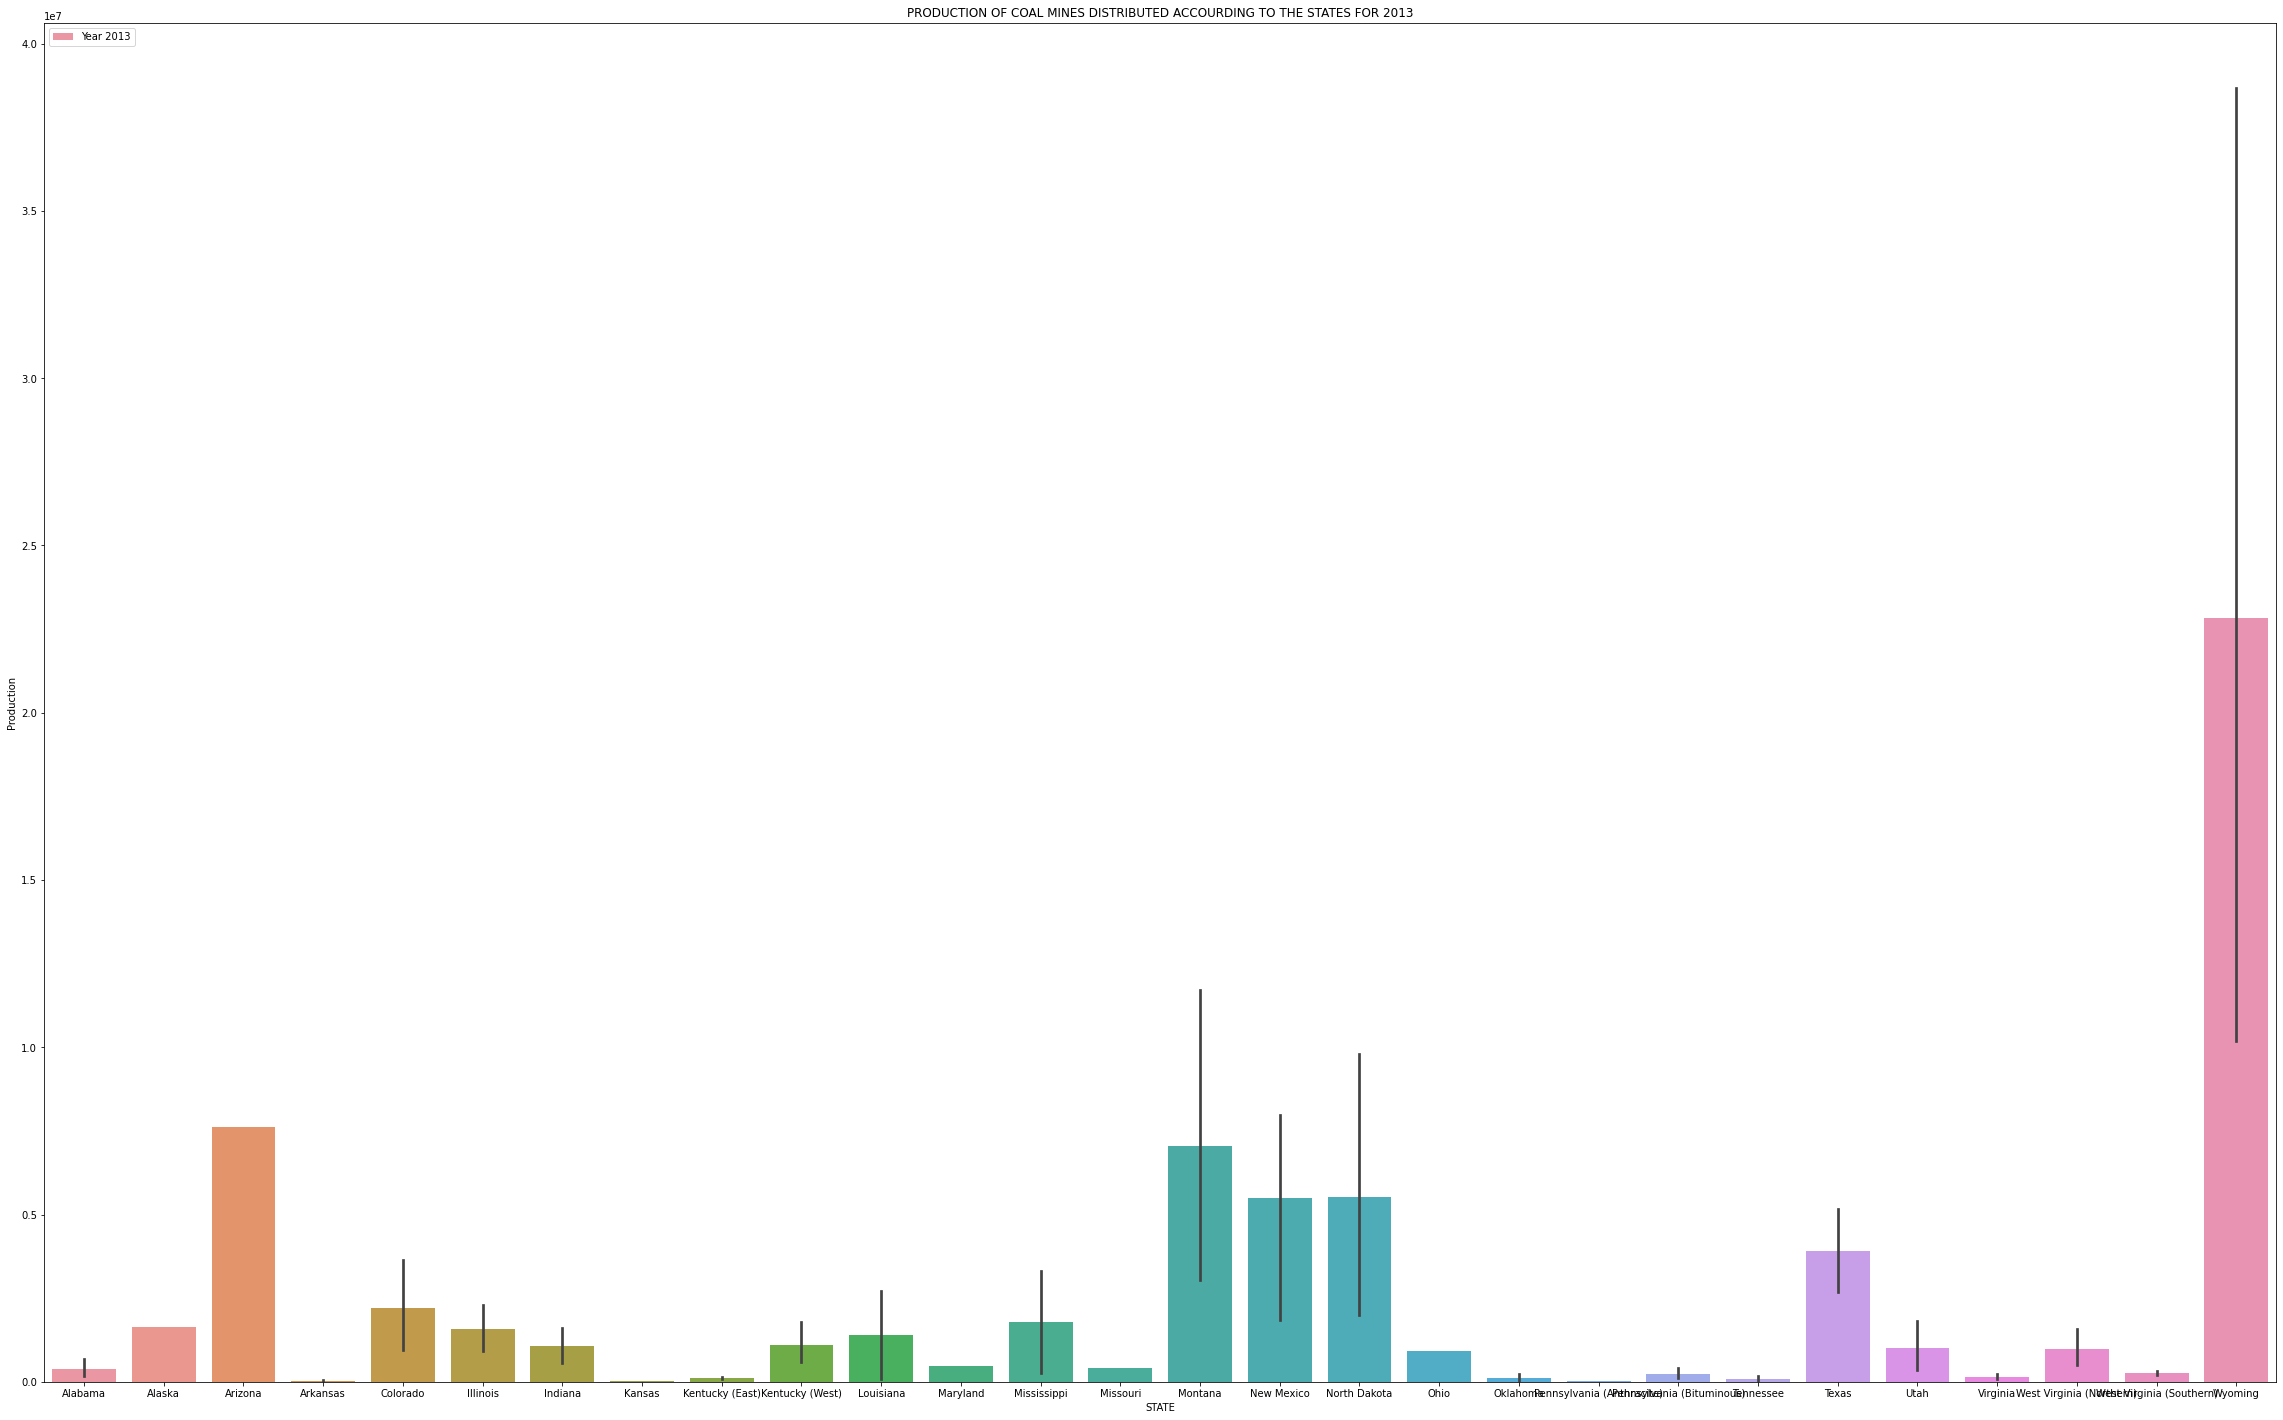

In [12]:
plt.figure(figsize=(40,25))
plt.title('PRODUCTION OF COAL MINES DISTRIBUTED ACCOURDING TO THE STATES FOR 2013')
sns.barplot(df['STATE'] [df['Year'] == 2013], y=df['Production'] [df['Year'] == 2013],label='Year 2013')
plt.legend(loc='upper left')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


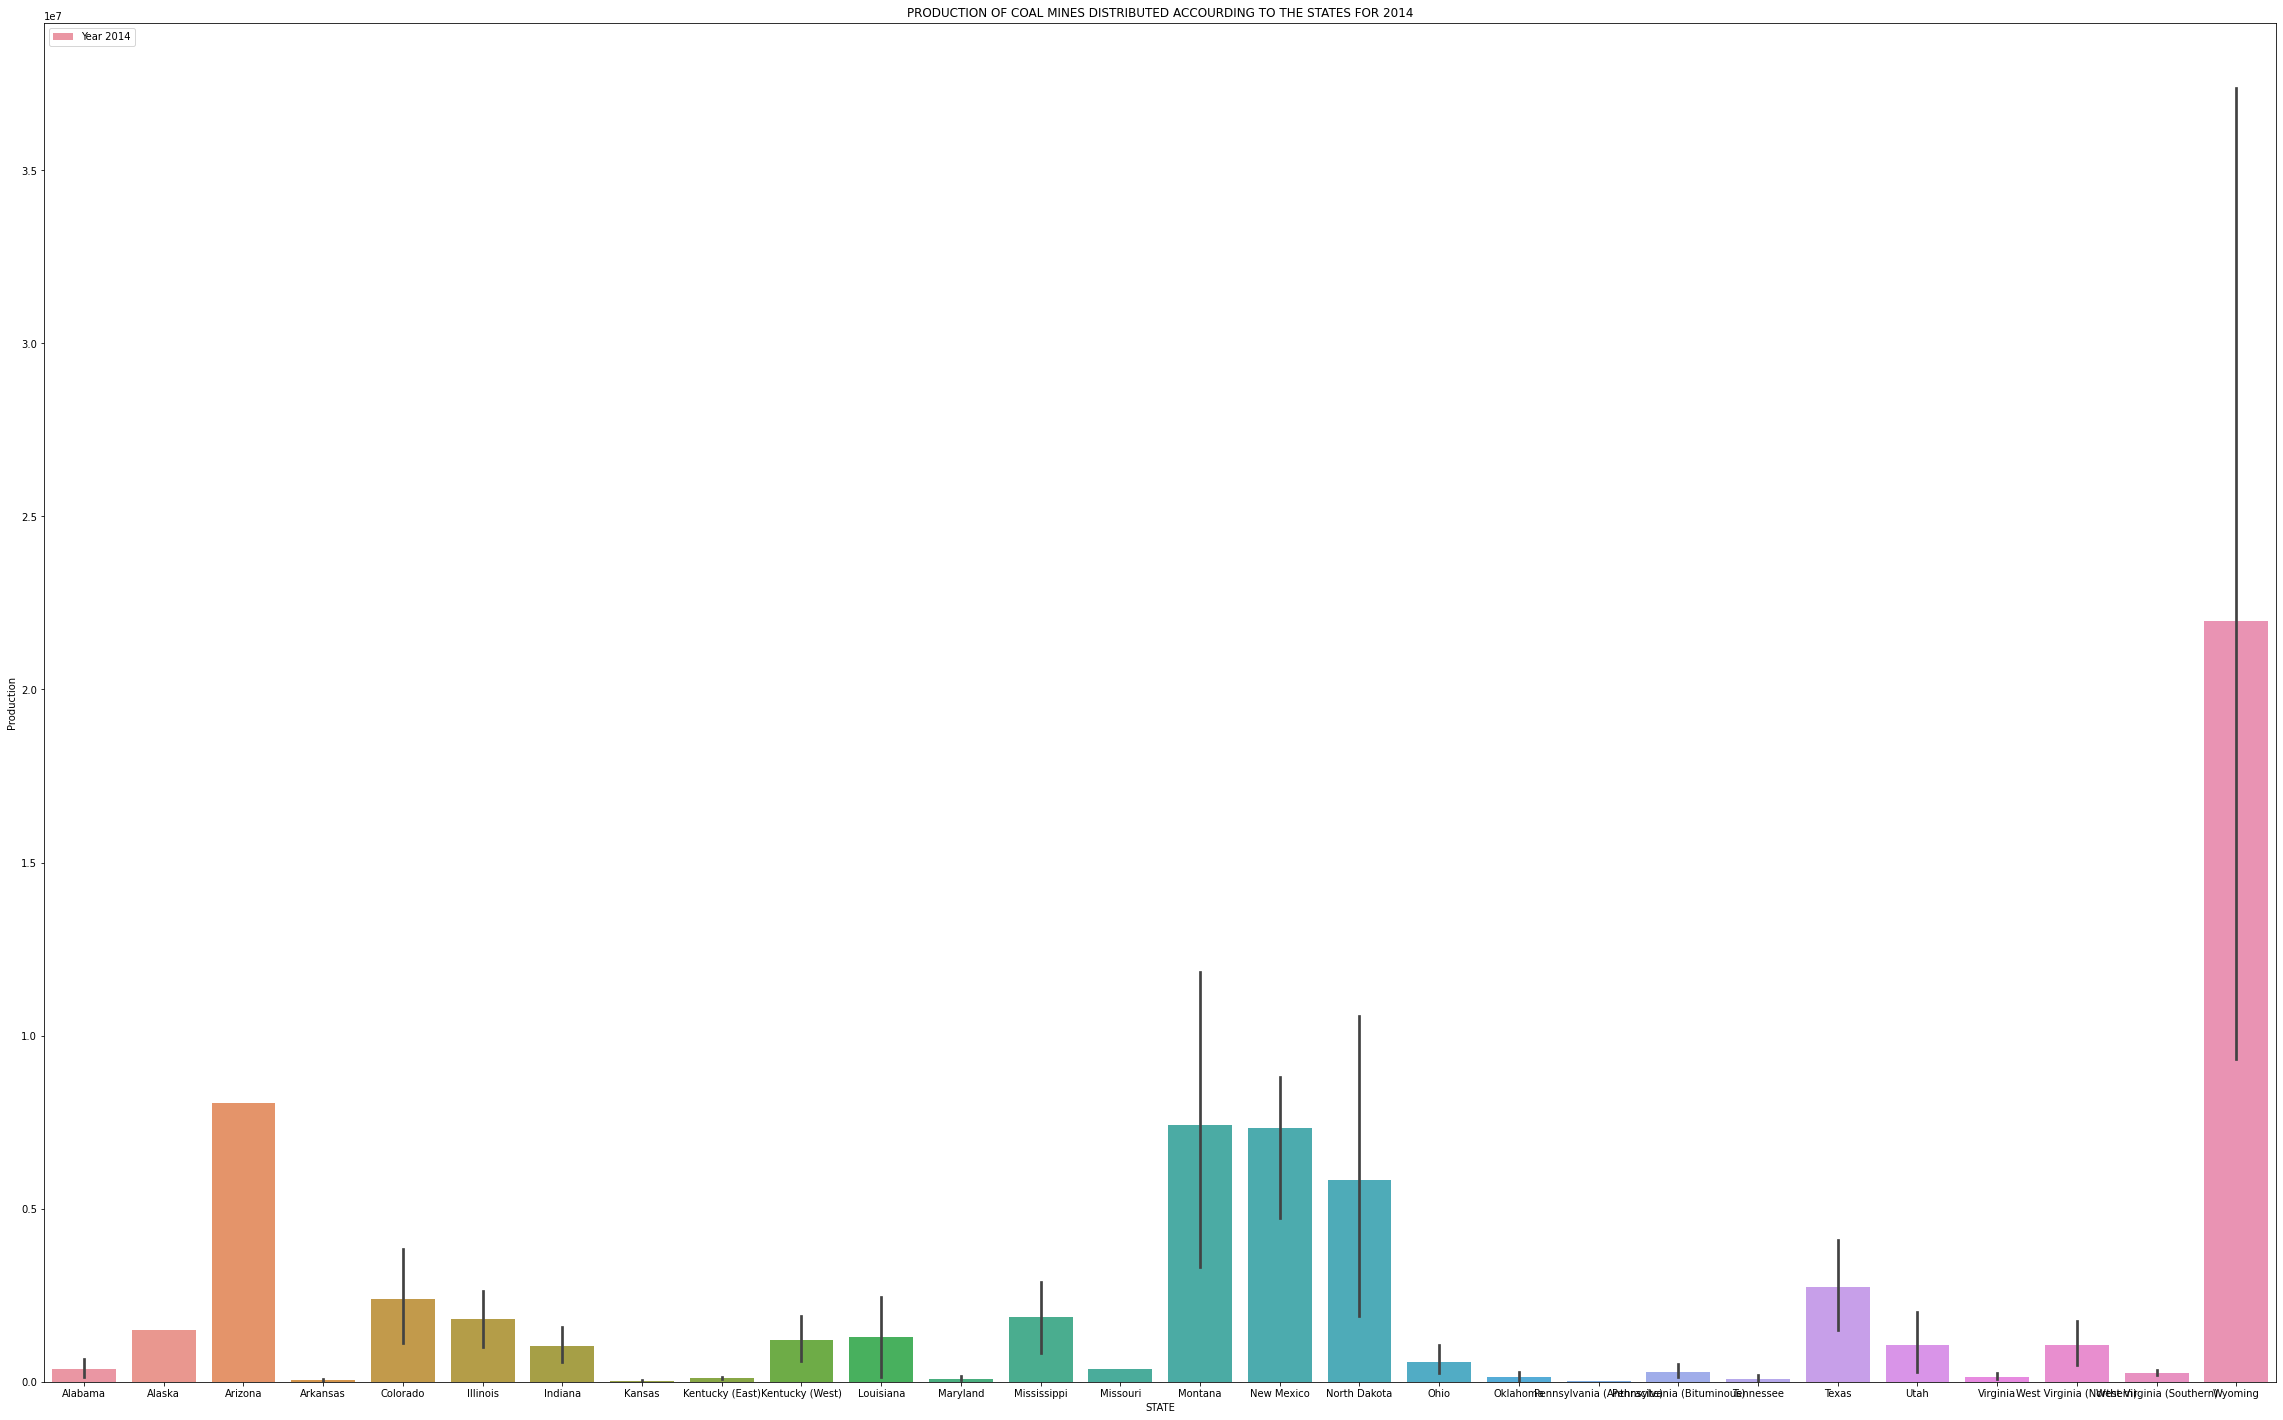

In [13]:
plt.figure(figsize=(40,25))
plt.title('PRODUCTION OF COAL MINES DISTRIBUTED ACCOURDING TO THE STATES FOR 2014')
sns.barplot(df['STATE'] [df['Year'] == 2014], y=df['Production'] [df['Year'] == 2014],label='Year 2014')
plt.legend(loc='upper left')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


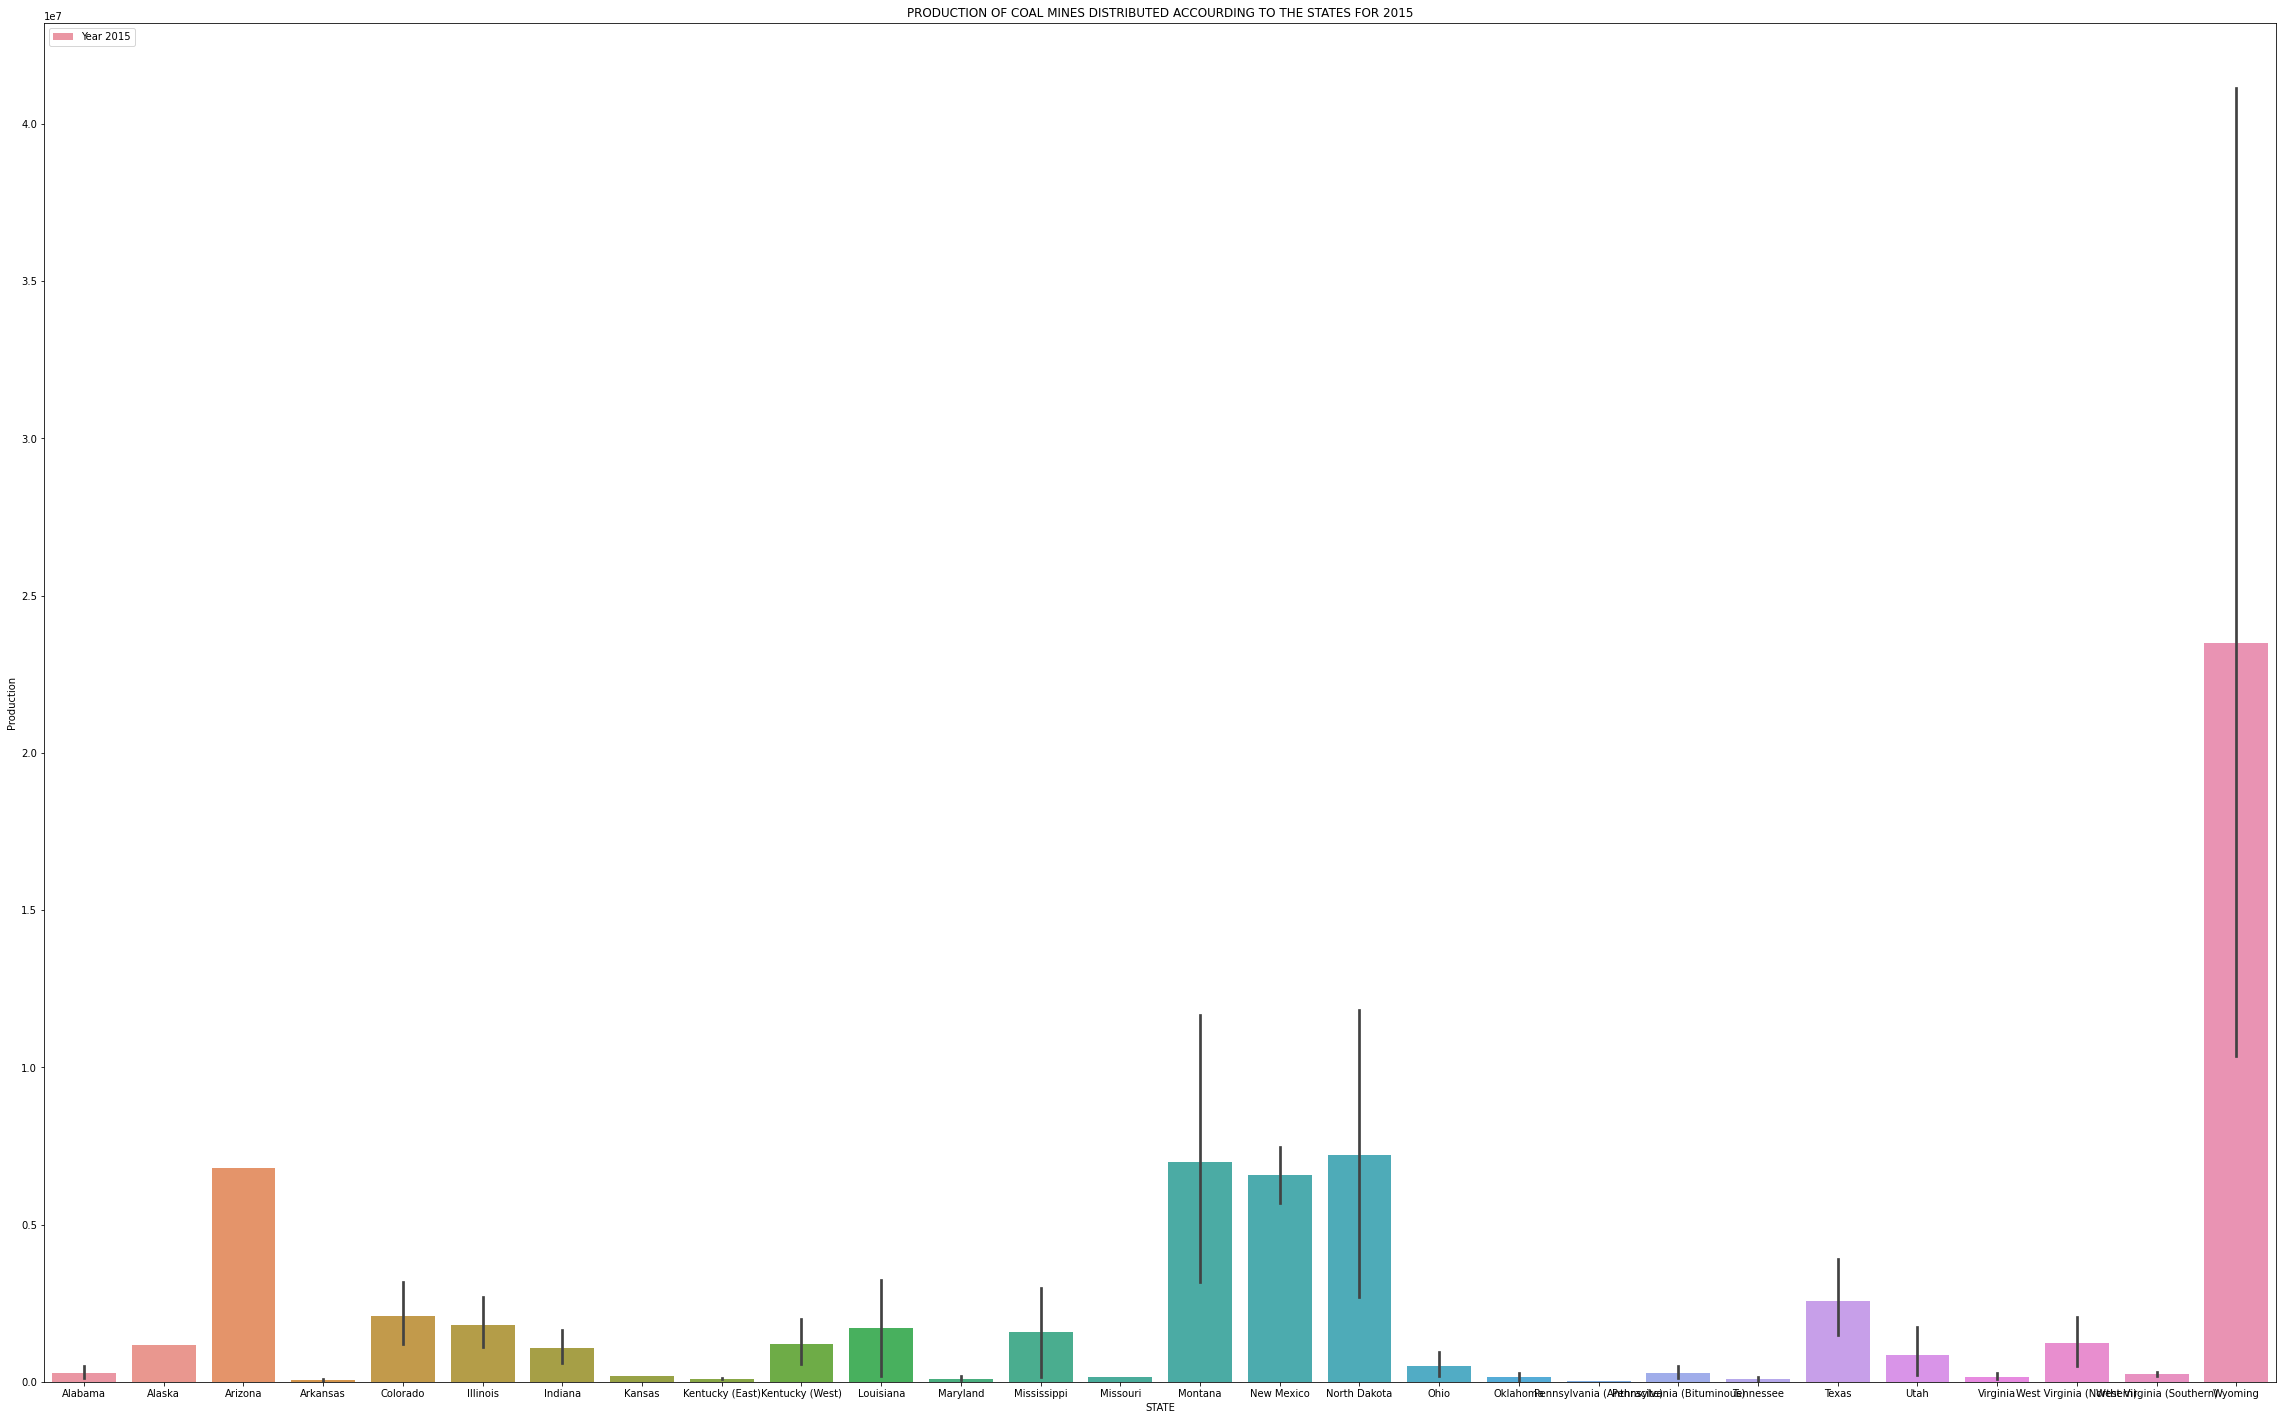

In [14]:
plt.figure(figsize=(40,25))
plt.title('PRODUCTION OF COAL MINES DISTRIBUTED ACCOURDING TO THE STATES FOR 2015')
sns.barplot(df['STATE'] [df['Year'] == 2015], y=df['Production'] [df['Year'] == 2015],label='Year 2015')
plt.legend(loc='upper left')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


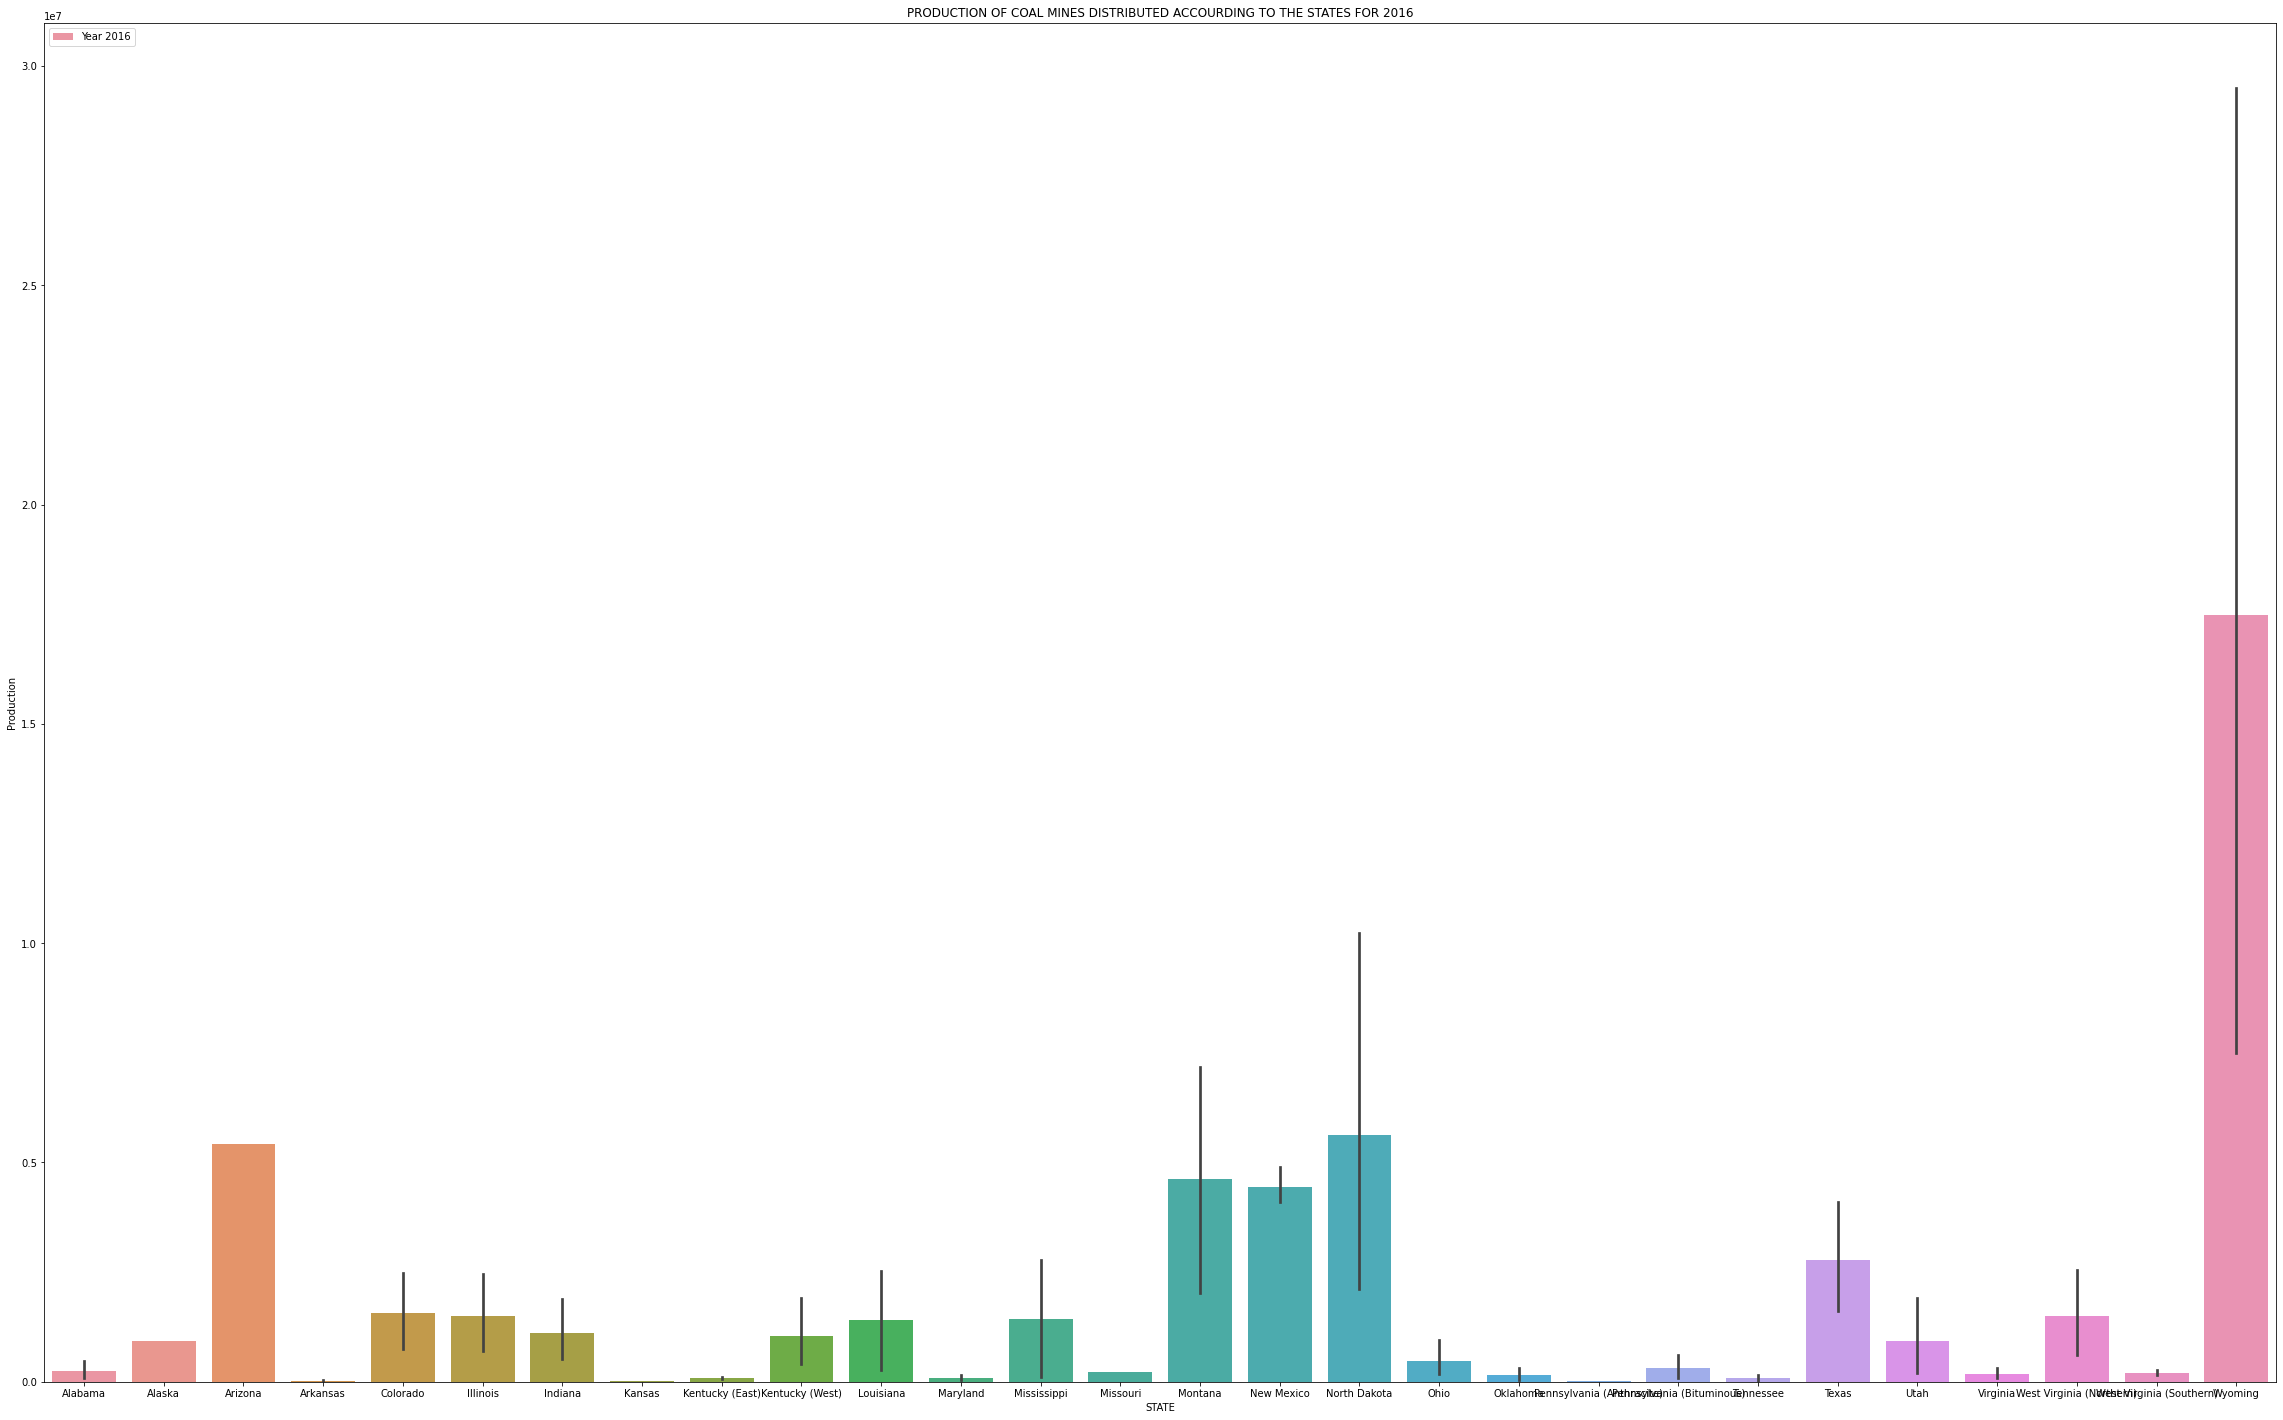

In [15]:
plt.figure(figsize=(40,25))
plt.title('PRODUCTION OF COAL MINES DISTRIBUTED ACCOURDING TO THE STATES FOR 2016')
sns.barplot(df['STATE'] [df['Year'] == 2016], y=df['Production'] [df['Year'] == 2016],label='Year 2016')
plt.legend(loc='upper left')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


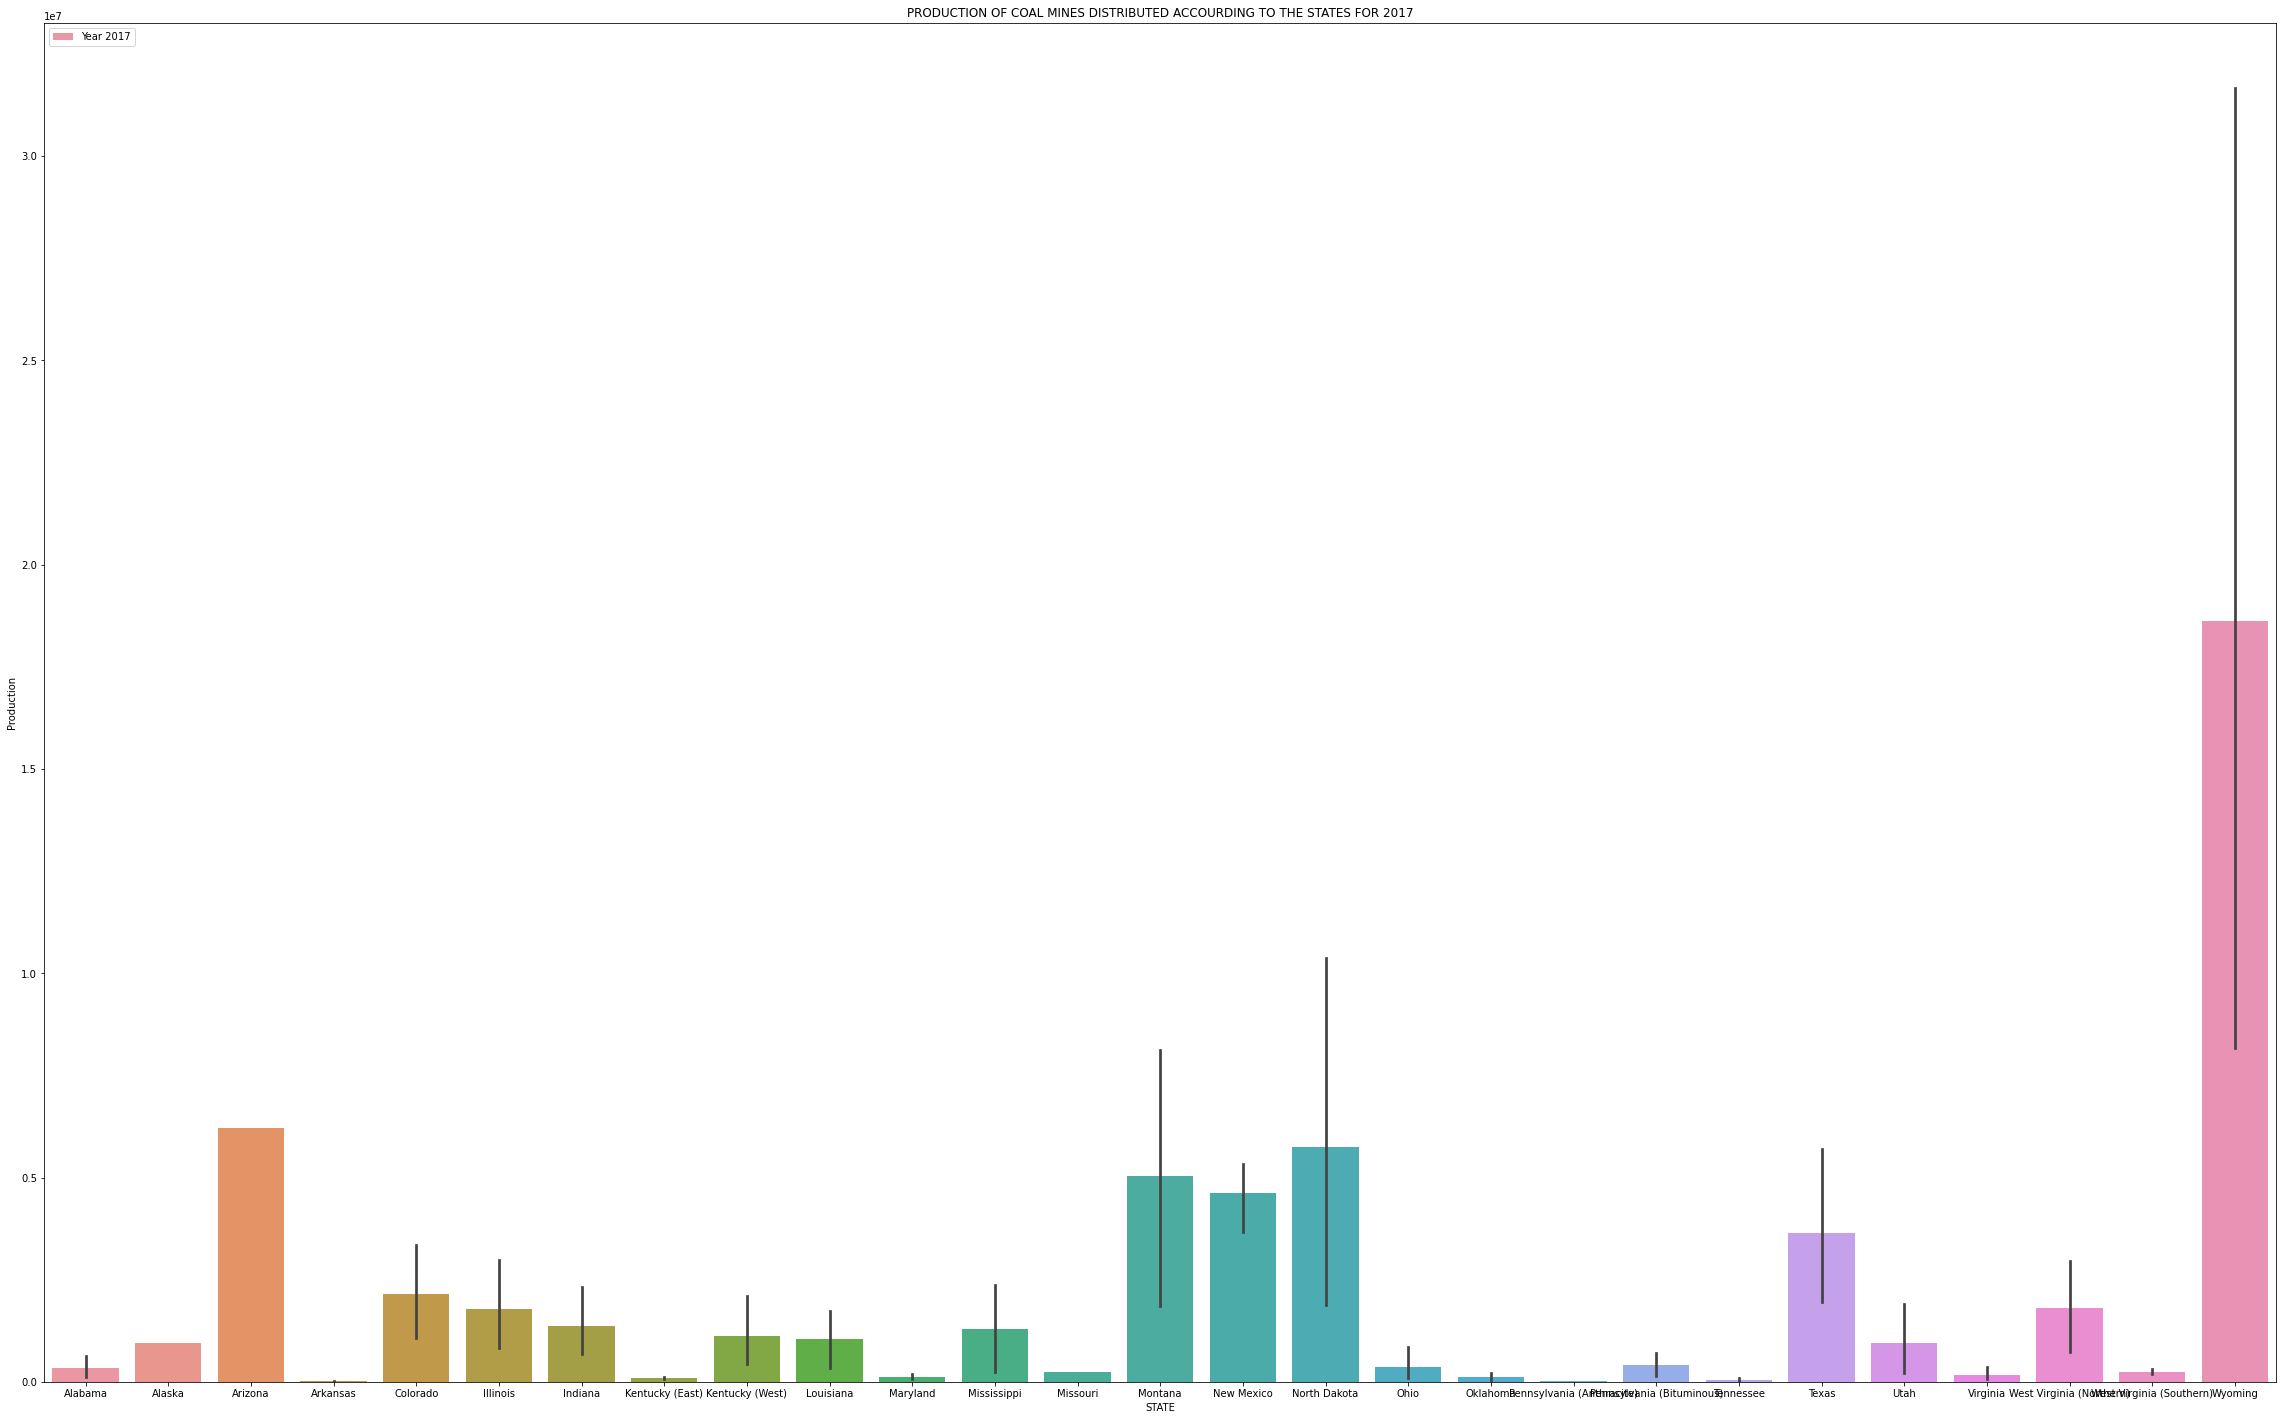

In [16]:
plt.figure(figsize=(40,25))
plt.title('PRODUCTION OF COAL MINES DISTRIBUTED ACCOURDING TO THE STATES FOR 2017')
sns.barplot(df['STATE'] [df['Year'] == 2017], y=df['Production'] [df['Year'] == 2017],label='Year 2017')
plt.legend(loc='upper left')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


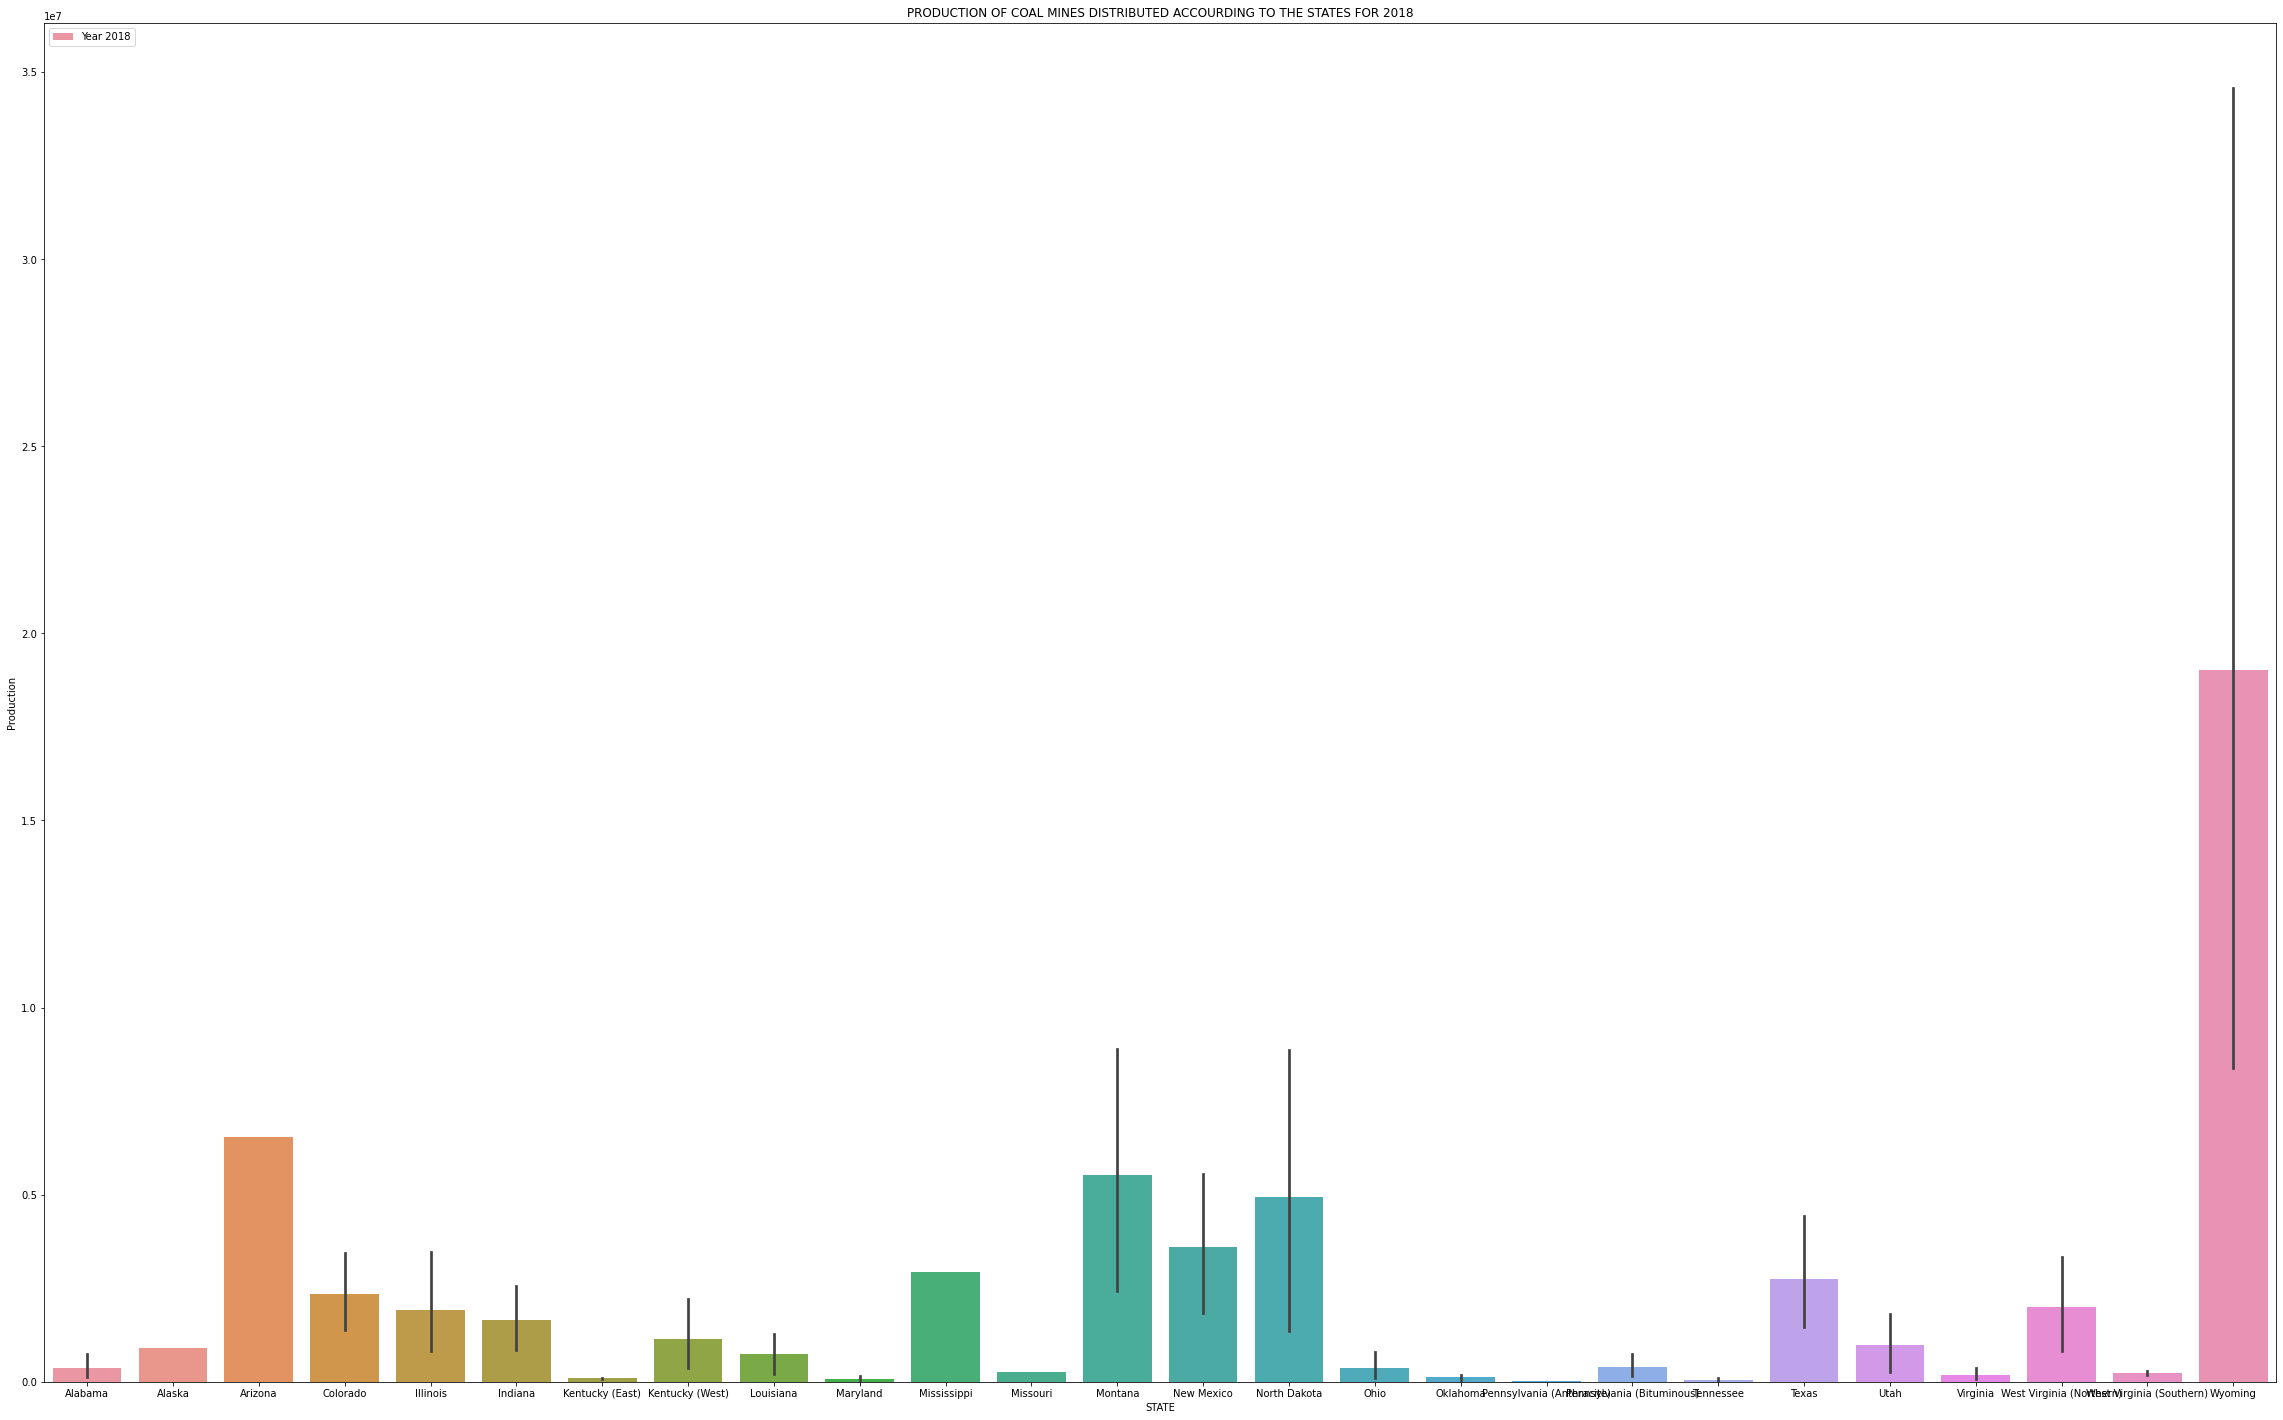

In [17]:
plt.figure(figsize=(40,25))
plt.title('PRODUCTION OF COAL MINES DISTRIBUTED ACCOURDING TO THE STATES FOR 2018')
sns.barplot(df['STATE'] [df['Year'] == 2018], y=df['Production'] [df['Year'] == 2018],label='Year 2018')
plt.legend(loc='upper left')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


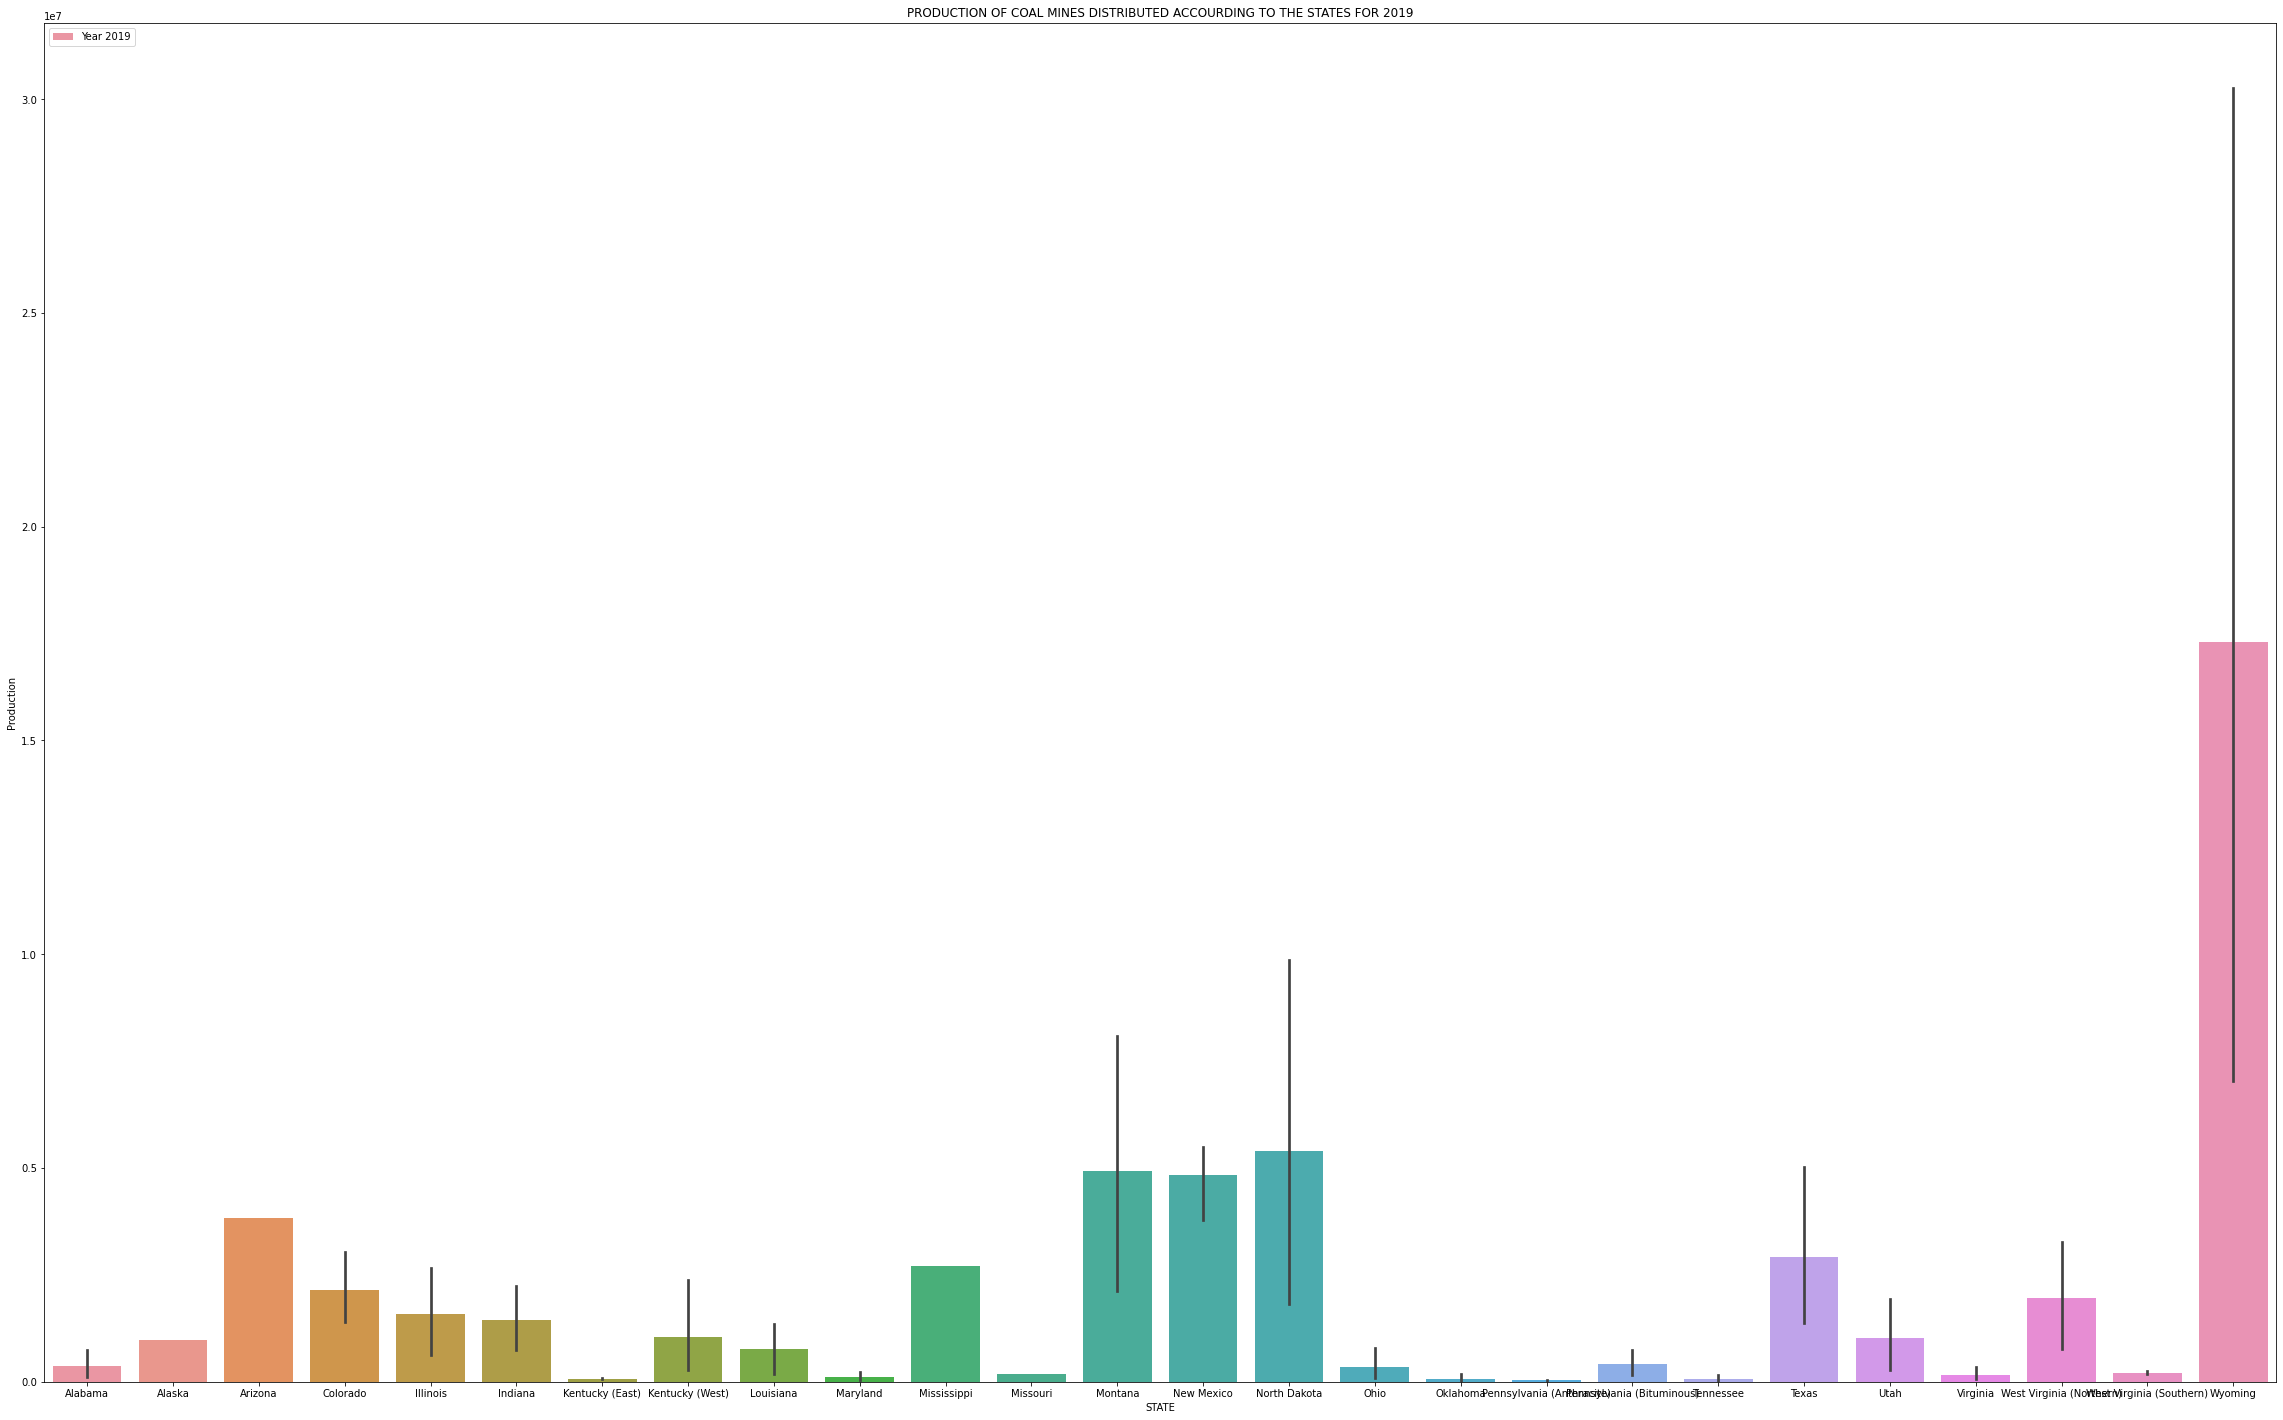

In [18]:
plt.figure(figsize=(40,25))
plt.title('PRODUCTION OF COAL MINES DISTRIBUTED ACCOURDING TO THE STATES FOR 2019')
sns.barplot(df['STATE'] [df['Year'] == 2019], y=df['Production'] [df['Year'] == 2019],label='Year 2019')
plt.legend(loc='upper left')
plt.show()

In [19]:
#df.rename(columns = {'Average Employees': 'Average_Employees'}, inplace = True)

In [20]:
#df.rename(columns = {'Mine State': 'Mine_State'}, inplace = True)

### Here We Copied dataframe into different dataframes, To Do Clustering in each dataframe .

In [21]:
df1 = df.copy(deep=True)
df2 = df1.copy(deep=True)
df3 = df2.copy(deep=True)
df4 = df3.copy(deep=True)
df5 = df4.copy(deep=True)
df6 = df5.copy(deep=True)
df7 = df5.copy(deep=True)

In [22]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [23]:
le = LabelEncoder()
df1['STATE']= le.fit_transform(df1['STATE'])

In [24]:
y_predicted = km.fit_predict(df1[['STATE','Production']])
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
df1['cluster'] = y_predicted
df1.head()

,Year,MSHAID,MineName,STATE,MineCounty,MineStatus,MineType,CompanyType,OperationType,OperatingCompany,OperatingCompanyAddress,UnionCode,CoalSupplyRegion,Production,AverageEmployee,LabourHours,latitute,longitude,cluster
0,2013,103381,Tacoa Highwall Miner,0,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392,32.3182,86.9023,0
1,2013,103404,Reid School Mine,0,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447,32.3182,86.9023,0
2,2013,100759,North River #1 Underground Min,0,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784,32.3182,86.9023,0
3,2013,103246,Bear Creek,0,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193,32.3182,86.9023,0
4,2013,103451,Knight Mine,0,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393,32.3182,86.9023,0


In [26]:
km.cluster_centers_

array([[1.66595428e+01, 2.86651846e+05],
       [2.70000000e+01, 9.27928881e+07],
       [1.78674699e+01, 9.81088144e+06]])

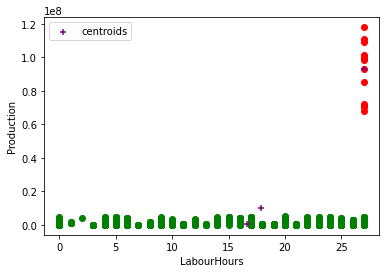

In [27]:
dfx = df1[df1.cluster==0]
dfy = df1[df1.cluster==1]



plt.scatter(dfx['STATE'],dfx['Production'],color='green')
plt.scatter(dfy['STATE'],dfy['Production'],color='red')


plt.xlabel('LabourHours')
plt.ylabel('Production')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label = 'centroids')
plt.legend()

### Clustering is the task of grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters. Here This is a cluster plot of labour hour wise production.So if the production is more labour hours will be high.

In [28]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df1[['LabourHours','Production']])
    sse.append(km.inertia_)

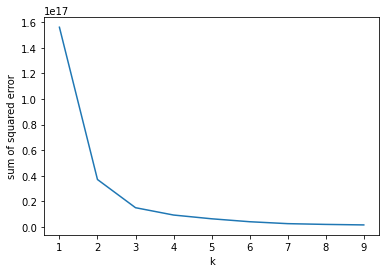

In [29]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)

### The Elbow Method is one of the most popular methods to determine this optimal value of k. Here the Optimal value of K is 3.

In [30]:
#scaler = StandardScaler()
#df2.iloc[:,[0]]=scaler.fit_transform(df2.iloc[:,[0]])
#print(df2.iloc[:,[0]])


In [31]:
#df2.head()

In [32]:
kme = KMeans(n_clusters = 3)
kme

KMeans(n_clusters=3)

In [33]:
y_pred = kme.fit_predict(df2[['Year','Production']])
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
df2['cluster'] = y_pred
df2.head()

,Year,MSHAID,MineName,STATE,MineCounty,MineStatus,MineType,CompanyType,OperationType,OperatingCompany,OperatingCompanyAddress,UnionCode,CoalSupplyRegion,Production,AverageEmployee,LabourHours,latitute,longitude,cluster
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392,32.3182,86.9023,0
1,2013,103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447,32.3182,86.9023,0
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784,32.3182,86.9023,0
3,2013,103246,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193,32.3182,86.9023,0
4,2013,103451,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393,32.3182,86.9023,0


In [35]:
kme.cluster_centers_

array([[2.01565981e+03, 2.86651846e+05],
       [2.01600000e+03, 9.27928881e+07],
       [2.01587149e+03, 9.81088144e+06]])

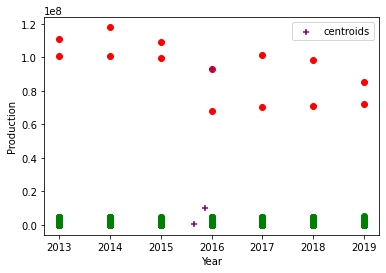

In [36]:
dfa = df2[df2.cluster==0]
dfb = df2[df2.cluster==1]



plt.scatter(dfa['Year'],dfa['Production'],color='green')
plt.scatter(dfb['Year'],dfb['Production'],color='red')


plt.xlabel('Year')
plt.ylabel('Production')
plt.scatter(kme.cluster_centers_[:,0],kme.cluster_centers_[:,1],color='purple',marker='+',label = 'centroids')
plt.legend()

### This is a cluster Plot of year wise production of coal. Here We Can see in the year 2014 the coal production was highest, and the year 2016 the coal production was lowest.

In [37]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df2[['Year','Production']])
    sse.append(km.inertia_)

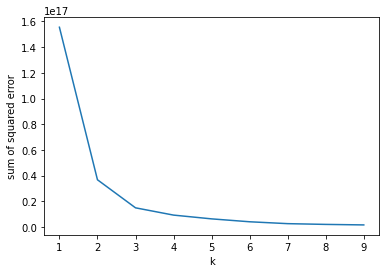

In [38]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)

### The Elbow Method is one of the most popular methods to determine this optimal value of k. Here the Optimal value of K is 3.

In [39]:
kms = KMeans(n_clusters = 4)
kms

KMeans(n_clusters=4)

In [40]:
#scaler = StandardScaler()
#df3.iloc[:,[0]]=scaler.fit_transform(df3.iloc[:,[0]])
#print(df3.iloc[:,[0]])

In [41]:
#scaler = StandardScaler()
#df3.iloc[:,[3]]=scaler.fit_transform(df3.iloc[:,[3]])
#print(df3.iloc[:,[3]])

In [42]:
#df3.head()

In [43]:
le = LabelEncoder()
df3['STATE']= le.fit_transform(df3['STATE'])

In [44]:
y_predict = kms.fit_predict(df3[['STATE','Year','Production']])
y_predict

array([2, 2, 2, ..., 2, 2, 2])

In [45]:
kms.cluster_centers_

array([[1.62865330e+01, 2.01580802e+03, 5.85662370e+06],
       [2.70000000e+01, 2.01600000e+03, 9.27928881e+07],
       [1.66730238e+01, 2.01565713e+03, 2.08185223e+05],
       [2.25087719e+01, 2.01601754e+03, 1.77497654e+07]])

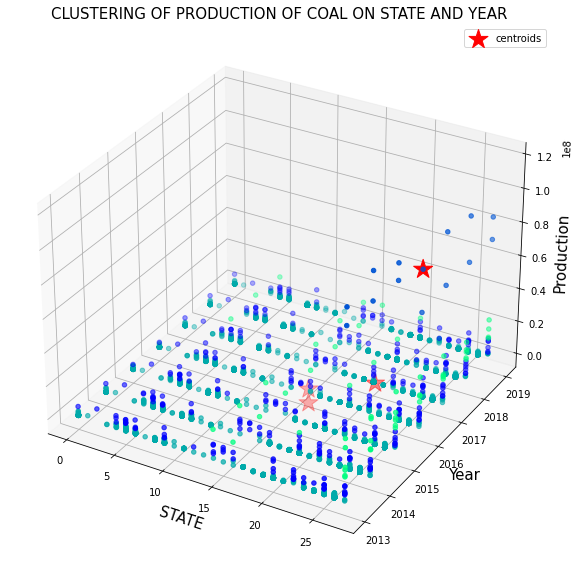

In [46]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(kms.cluster_centers_[:, 0],
            kms.cluster_centers_[:, 1],
            kms.cluster_centers_[:, 2],
            s = 400,
            marker='*',
            c='red',
            label='centroids')
scatter = ax.scatter(df3['STATE'],df3['Year'], df3['Production'],
                     c=y_predict,s=20, cmap='winter')


ax.set_title('CLUSTERING OF PRODUCTION OF COAL ON STATE AND YEAR',fontsize = 15)
ax.set_xlabel('STATE',fontsize = 15)
ax.set_ylabel('Year',fontsize = 15)
ax.set_zlabel('Production',fontsize = 15)
ax.legend()
plt.show()

### The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples. Here This is a 3D Cluster Plot Of Year Wise Production of a State. In The Year of 2018 & 2019  few states have high production.

In [47]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df3[['STATE','Year','Production']])
    sse.append(km.inertia_)

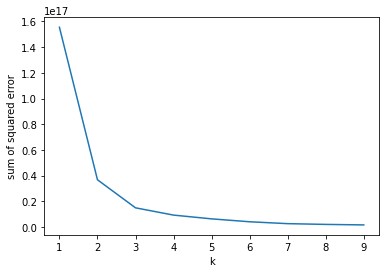

In [48]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)

In [49]:
kmx = KMeans(n_clusters = 3)
kmx

KMeans(n_clusters=3)

In [50]:
y_pr = kmx.fit_predict(df4[['latitute','longitude','Production']])
y_pr

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
kmx.cluster_centers_

array([[3.87586514e+01, 6.09526479e+01, 2.86651846e+05],
       [4.30760000e+01, 1.07290300e+02, 9.27928881e+07],
       [4.09324172e+01, 8.34417110e+01, 9.81088144e+06]])

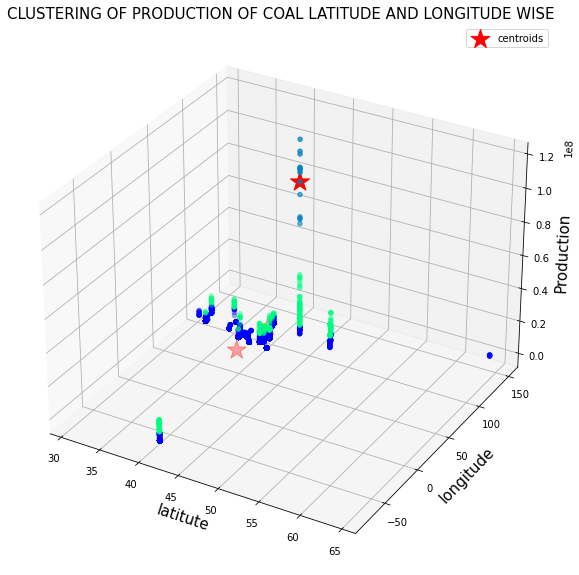

In [52]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(kmx.cluster_centers_[:, 0],
            kmx.cluster_centers_[:, 1],
            kmx.cluster_centers_[:, 2],
            
            s = 400,
            marker='*',
            c='red',
            label='centroids')
scatter = ax.scatter(df4['latitute'],df4['longitude'], df4['Production'],
                     c=y_pr,s=20, cmap='winter')


ax.set_title('CLUSTERING OF PRODUCTION OF COAL LATITUDE AND LONGITUDE WISE',fontsize = 15)
ax.set_xlabel('latitute',fontsize = 15)
ax.set_ylabel('longitude',fontsize = 15)
ax.set_zlabel('Production',fontsize = 15)
ax.legend()
plt.show()

### This is a 3D Cluster Plot of Latitute, Longitude Wise Production. Here We Can See at one point of latitute and longitude production rate is high, which is the state of Wyomming.

In [53]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df4[['latitute','longitude','Production']])
    sse.append(km.inertia_)

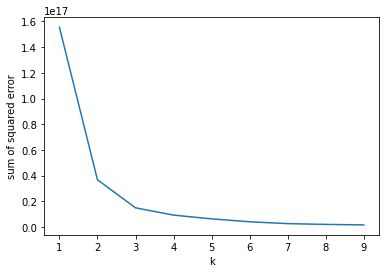

In [54]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)

In [55]:
kmc = KMeans(n_clusters = 4)
kmc

KMeans(n_clusters=4)

In [56]:
df5.head()

,Year,MSHAID,MineName,STATE,MineCounty,MineStatus,MineType,CompanyType,OperationType,OperatingCompany,OperatingCompanyAddress,UnionCode,CoalSupplyRegion,Production,AverageEmployee,LabourHours,latitute,longitude
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392,32.3182,86.9023
1,2013,103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447,32.3182,86.9023
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784,32.3182,86.9023
3,2013,103246,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193,32.3182,86.9023
4,2013,103451,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393,32.3182,86.9023


In [57]:
le = LabelEncoder()
df5['STATE']= le.fit_transform(df5['STATE'])

In [58]:
y_p = kmc.fit_predict(df5[['STATE','AverageEmployee','LabourHours']])
y_p

array([2, 2, 0, ..., 0, 0, 0])

In [59]:
kmc.cluster_centers_

array([[1.74382716e+01, 1.73904938e+02, 3.90271040e+05],
       [1.55101351e+01, 4.44047297e+02, 1.01305154e+06],
       [1.66684049e+01, 2.01174847e+01, 4.22663399e+04],
       [1.99000000e+01, 1.11073333e+03, 2.47269293e+06]])

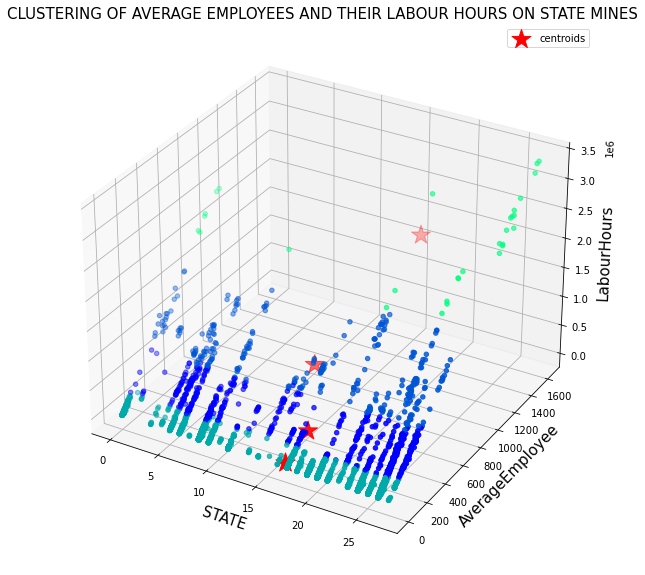

In [60]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(kmc.cluster_centers_[:, 0],
            kmc.cluster_centers_[:, 1],
            kmc.cluster_centers_[:, 2],
            s = 400,
            marker='*',
            c='red',
            label='centroids')
scatter = ax.scatter(df5['STATE'],df5['AverageEmployee'], df5['LabourHours'],
                     c=y_p,s=20, cmap='winter')


ax.set_title('CLUSTERING OF AVERAGE EMPLOYEES AND THEIR LABOUR HOURS ON STATE MINES',fontsize = 15)
ax.set_xlabel('STATE',fontsize = 15)
ax.set_ylabel('AverageEmployee',fontsize = 15)
ax.set_zlabel('LabourHours',fontsize = 15)
ax.legend()
plt.show()

### This is a 3D Cluster Plot of State Wise Average Employees and Labour Hours, Here We Can see the average employees of all states are almost similar, but the labour hours of those states are higher which are high in production. We came to know this by the BarPlot Chart that we plotted above.

In [61]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df5[['STATE','AverageEmployee','LabourHours']])
    sse.append(km.inertia_)

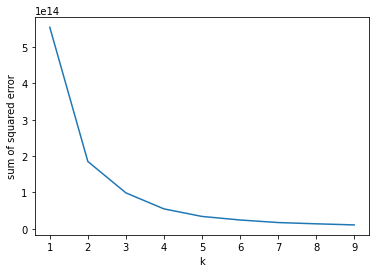

In [62]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)

In [63]:
kmn = KMeans(n_clusters = 3)
kmn

KMeans(n_clusters=3)

In [64]:
y_pi = kmn.fit_predict(df6[['Production','AverageEmployee','LabourHours']])
y_pi

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
kmn.cluster_centers_

array([[2.86651846e+05, 4.22676856e+01, 9.34758135e+04],
       [9.27928881e+07, 1.35700000e+03, 2.81783050e+06],
       [9.81088144e+06, 4.22915663e+02, 9.44673916e+05]])

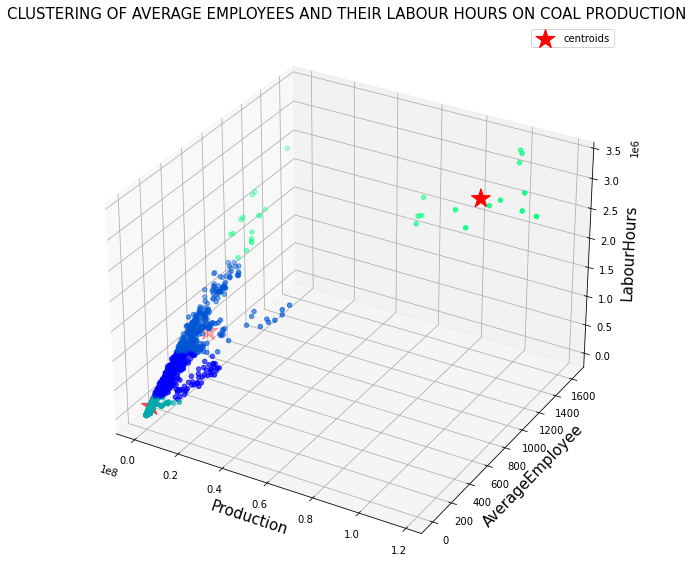

In [66]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(kmn.cluster_centers_[:, 0],
            kmn.cluster_centers_[:, 1],
            kmn.cluster_centers_[:, 2],
            s = 400,
            marker='*',
            c='red',
            label='centroids')
scatter = ax.scatter(df6['Production'],df6['AverageEmployee'], df6['LabourHours'],
                     c=y_p,s=20, cmap='winter')


ax.set_title('CLUSTERING OF AVERAGE EMPLOYEES AND THEIR LABOUR HOURS ON COAL PRODUCTION',fontsize = 15)
ax.set_xlabel('Production',fontsize = 15)
ax.set_ylabel('AverageEmployee',fontsize = 15)
ax.set_zlabel('LabourHours',fontsize = 15)
ax.legend()
plt.show()

### This is a 3D Cluster Plot of Production Wise Distribution of Average Employees and Labour hours, Here We Can See if the Production Rate is high then Labour Hours is also high. 

In [67]:
kmz = KMeans(n_clusters = 3)
kmz


KMeans(n_clusters=3)

In [68]:
le = LabelEncoder()
df7['STATE']= le.fit_transform(df7['STATE'])

In [69]:
y_pz = kmz.fit_predict(df7[['Production','STATE','LabourHours']])
y_pz

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
kmz.cluster_centers_

array([[2.86651846e+05, 1.66595428e+01, 9.34758135e+04],
       [9.27928881e+07, 2.70000000e+01, 2.81783050e+06],
       [9.81088144e+06, 1.78674699e+01, 9.44673916e+05]])

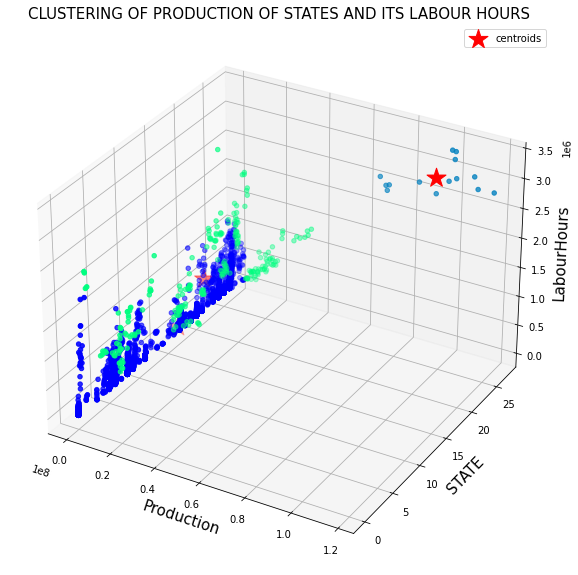

In [71]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(kmz.cluster_centers_[:, 0],
            kmz.cluster_centers_[:, 1],
            kmz.cluster_centers_[:, 2],
            s = 400,
            marker='*',
            c='red',
            label='centroids')
scatter = ax.scatter(df7['Production'],df7['STATE'], df7['LabourHours'],
                     c=y_pz,s=20, cmap='winter')


ax.set_title('CLUSTERING OF PRODUCTION OF STATES AND ITS LABOUR HOURS',fontsize = 15)
ax.set_xlabel('Production',fontsize = 15)
ax.set_ylabel('STATE',fontsize = 15)
ax.set_zlabel('LabourHours',fontsize = 15)
ax.legend()
plt.show()

### This is a 3D Cluster Plot of Production Wise Distribution of State and Labour hours, Here We Can See if the Production Rate is high then Labour Hours is also high.

In [72]:
df[['Production']].isna().sum()

Production    0
dtype: int64

### We Have Done Binning Here To Transaform Our Target Variable From Continous To Categorical.

In [73]:
bins = [0,100,1000,100000,1000000,100000000]
group_names=["zerotohun","huntothou","thoutolk","lktocr","crtotencr"]
df['PRODUCTION']= pd.cut(df["Production"],bins,labels = group_names)
df

,Year,MSHAID,MineName,STATE,MineCounty,MineStatus,MineType,CompanyType,OperationType,OperatingCompany,OperatingCompanyAddress,UnionCode,CoalSupplyRegion,Production,AverageEmployee,LabourHours,latitute,longitude,PRODUCTION
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",,Appalachia Southern,56004,10,22392,32.3182,86.9023,thoutolk
1,2013,103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",UNIT,Appalachia Southern,28807,18,28447,32.3182,86.9023,thoutolk
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",UNIT,Appalachia Southern,1440115,183,474784,32.3182,86.9023,crtotencr
3,2013,103246,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",,Appalachia Southern,87587,13,29193,32.3182,86.9023,thoutolk
4,2013,103451,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",,Appalachia Southern,147499,27,46393,32.3182,86.9023,lktocr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,2019,4801337,Antelope Coal Mine,Wyoming,Converse,Active,Surface,Indepedent Producer Operator,Mine only,Navajo Transitional Energy Com,"P.O. Box 3001, Gillette, WY 82717",NaN,Powder River Basin,23243371,591,1200850,43.0760,107.2903,crtotencr
7652,2019,4800086,Kemmerer Mine,Wyoming,Lincoln,Active,Surface,Operating Subsidiary,Mine and Preparation Plant,"Kemmerer Operations, Llc","P.O. Box 950, Kemmerer, WY 83101",United Mine Workers Of America,Western,3067446,272,473600,43.0760,107.2903,crtotencr
7653,2019,4800677,Jim Bridger Mine,Wyoming,Sweetwater,Active,Surface,Operating Subsidiary,Mine only,Bridger Coal Company,"P.O. Box 68, Point Of Rock, WY 82942",Western Energy Workers,Western,2326392,219,431217,43.0760,107.2903,crtotencr
7654,2019,4801180,Black Butte And Leucite Hills,Wyoming,Sweetwater,Active,Surface,Operating Subsidiary,Mine only,Black Butte Coal Company,"P.O. Box 98, Point Of Rock, WY 82942",NaN,Western,2307947,162,299134,43.0760,107.2903,crtotencr


In [74]:
df['PRODUCTION'].dtype

CategoricalDtype(categories=['zerotohun', 'huntothou', 'thoutolk', 'lktocr', 'crtotencr'], ordered=True)

In [75]:
df.drop(['UnionCode'], axis = 1, inplace = True) 

In [76]:
df.isnull().sum()

Year                          0
MSHAID                        0
MineName                      0
STATE                         0
MineCounty                    0
MineStatus                    0
MineType                      0
CompanyType                   0
OperationType                 0
OperatingCompany              0
OperatingCompanyAddress       0
CoalSupplyRegion              1
Production                    0
AverageEmployee               0
LabourHours                   0
latitute                      0
longitude                     0
PRODUCTION                 2136
dtype: int64

### After Binning We Have Found 2136 Null Values In the Newly Form Binning Column, So we drop the null values 

In [77]:
df.dropna(how = 'any',inplace = True)

In [78]:
df.shape

(5519, 18)

In [79]:
df.head()

,Year,MSHAID,MineName,STATE,MineCounty,MineStatus,MineType,CompanyType,OperationType,OperatingCompany,OperatingCompanyAddress,CoalSupplyRegion,Production,AverageEmployee,LabourHours,latitute,longitude,PRODUCTION
0,2013,103381,Tacoa Highwall Miner,Alabama,Bibb,"Active, men working, not producing",Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",Appalachia Southern,56004,10,22392,32.3182,86.9023,thoutolk
1,2013,103404,Reid School Mine,Alabama,Blount,Permanently abandoned,Surface,Indepedent Producer Operator,Mine only,"Taft Coal Sales & Associates,","3000 Riverchase Galleria Ste 1, Birmingham, AL...",Appalachia Southern,28807,18,28447,32.3182,86.9023,thoutolk
2,2013,100759,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Mine and Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",Appalachia Southern,1440115,183,474784,32.3182,86.9023,crtotencr
3,2013,103246,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",Appalachia Southern,87587,13,29193,32.3182,86.9023,thoutolk
4,2013,103451,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",Appalachia Southern,147499,27,46393,32.3182,86.9023,lktocr


In [80]:
df['PRODUCTION'].dtype

CategoricalDtype(categories=['zerotohun', 'huntothou', 'thoutolk', 'lktocr', 'crtotencr'], ordered=True)

In [81]:
#dummies = pd.get_dummies(df.STATE)
#dummies.head()

In [82]:
#df = pd.concat([df,dummies],axis='columns')
#df.head()

### Here we LabelEncoded the Production & States Column which we use in our features and were object datatypes.

In [83]:
le = LabelEncoder()
df['PRODUCTION']= le.fit_transform(df['PRODUCTION'])

In [84]:
le = LabelEncoder()
df['STATE']= le.fit_transform(df['STATE'])

In [85]:
x = df.iloc[:,[0,3]]
y = df['PRODUCTION']

In [86]:
x

,Year,STATE
0,2013,0
1,2013,0
2,2013,0
3,2013,0
4,2013,0
...,...,...
7651,2019,27
7652,2019,27
7653,2019,27
7654,2019,27


In [87]:
#from sklearn.preprocessing import StandardScaler
#x=StandardScaler().fit_transform(x)

In [88]:
y.head()

0    3
1    3
2    0
3    3
4    2
Name: PRODUCTION, dtype: int32

### Here We Perform Test, Train & Split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dst = DecisionTreeClassifier(max_depth = 10,random_state = 200,max_leaf_nodes = 13)
dst = dst.fit(x_train,y_train)

In [92]:
y_pre = dst.predict(x_test)
y_pre

array([3, 3, 0, ..., 2, 3, 0])

In [93]:
dst.score(x_test, y_test)

0.5996376811594203

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pre))
print(classification_report(y_test, y_pre))

[[ 97   0  39  18   0]
 [  0   0   7  24   0]
 [ 40   0 205 176   0]
 [ 13   0 121 360   0]
 [  0   0   1   3   0]]
              precision    recall  f1-score   support

           0       0.65      0.63      0.64       154
           1       0.00      0.00      0.00        31
           2       0.55      0.49      0.52       421
           3       0.62      0.73      0.67       494
           4       0.00      0.00      0.00         4

    accuracy                           0.60      1104
   macro avg       0.36      0.37      0.36      1104
weighted avg       0.58      0.60      0.59      1104



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
import pickle
# Saving model to disk
pickle.dump(dst, open('model.pkl','wb'))

In [96]:
# Loading model to compare the results
modell = pickle.load(open('model.pkl','rb'))

In [97]:
print("Production of given year and state is",dst.predict([[2015,20]]),"Tons")

Production of given year and state is [3] Tons
